# Importación de bibliotecas necesarias

In [1]:
import numpy as np  # NumPy para operaciones numéricas eficientes
import pandas as pd  # Pandas para manipulación de datos en estructuras de datos tipo DataFrame
import matplotlib.pyplot as plt  # Matplotlib para visualización de datos
import seaborn as sns  # Seaborn para gráficos estadísticos atractivos
plt.style.use('seaborn-v0_8')  # Configuración del estilo de los gráficos con Seaborn
import warnings  # Biblioteca para gestionar advertencias
warnings.filterwarnings('ignore')  # Ignorar las advertencias para mejorar la legibilidad del código
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas al imprimir un DataFrame

# Leer el conjunto de datos y realizar un análisis inicial

In [2]:
# Cargar el conjunto de datos desde un archivo CSV
data = pd.read_csv(r"C:\Users\mateo\Documents\cancer_data_science\Data\cancer-data.csv") # Poner tu ruta del archivo. Click derecho y copiar como ruta de acceso

# Crear un DataFrame para almacenar y manipular los datos
df = pd.DataFrame(data)

# Visualizar el DataFrame recién creado
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812                 0.05667     0.5435      0.7339   
2           0.2069                 0.05999     0.7456      0.7869   
3           0.2597                 0.09744     0.4956      1.1560   
4           0.1809                 0.05883     0.7572      0.7813   
..             ...                     ...        ...         ...   
564         0.1726                 0.05623     1.1760      1.2560   
565         0.1752                 0.05533     0.7655      2.4630   
566         0.1590                 0.05648     0.4564      1.0750   
567         0.2397                 0.07016     0.7260      1.5950   
568         0.1587                 0.05884     0.3857      1.4280   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
0           8.589   153.40       0.006399         0.04904       0.05373   
1           3.398    74.08       0.005225         0.01308       0.01860   
2           4.585    94.03       0.006150         0.04006       0.03832   
3           3.445    27.23       0.009110         0.07458       0.05661   
4           5.438    94.44       0.011490         0.02461       0.05688   
..            ...      ...            ...             ...           ...   
564         7.673   158.70       0.010300         0.02891       0.05198   
565         5.203    99.04       0.005769         0.02423       0.03950   
566         3.425    48.55       0.005903         0.03731       0.04730   
567         5.772    86.22       0.006522         0.06158       0.07117   
568         2.548    19.15       0.007189         0.00466       0.00000   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
0              0.01587      0.03003              0.006193        25.380   
1              0.01340      0.01389              0.003532        24.990   
2              0.02058      0.02250              0.004571        23.570   
3              0.01867      0.05963              0.009208  

In [6]:
# Definir un diccionario para mapear los nombres de las columnas en inglés a español
nombres_de_ingles_a_espanol = {
    'id': 'id',
    'diagnosis': 'diagnostico',
    'radius_mean': 'radio_medio',
    'texture_mean': 'textura_media',
    'perimeter_mean': 'perimetro_medio',
    'area_mean': 'area_media',
    'smoothness_mean': 'suavidad_media',
    'compactness_mean': 'compacidad_medio',
    'concavity_mean': 'concavidad_media',
    'concave points_mean': 'puntos_concavos_medio',
    'symmetry_mean': 'simetria_media',
    'fractal_dimension_mean': 'dimension_fractal_media',
    'radius_se': 'radio_estandar_error',
    'texture_se': 'textura_estandar_error',
    'perimeter_se': 'perimetro_estandar error',
    'area_se': 'area_estandar_error',
    'smoothness_se': 'suavidad_estandar_error',
    'compactness_se': 'compacidad_estandar_error',
    'concavity_se': 'concavidad_estandar_error',
    'concave points_se': 'puntos_concavos_estandar_error',
    'symmetry_se': 'simetria_estandar_error',
    'fractal_dimension_se': 'dimension_fractal_estandar_error',
    'radius_worst': 'peor_caso_de_radio',
    'texture_worst': 'peor_caso_de_textura',
    'perimeter_worst': 'peor_caso_de_perimetro',
    'area_worst': 'peor_caso_de_area',
    'smoothness_worst': 'peor_caso_de_suavidad',
    'compactness_worst': 'peor_caso_de_compacidad',
    'concavity_worst': 'peor_caso_de_concavidad',
    'concave points_worst': 'peor_caso_de_puntos_concavos',
    'symmetry_worst': 'peor_caso_de_simetria',
    'fractal_dimension_worst': 'peor_caso_de_dimension_fractal'
}

# Cambia los nombres de las columnas utilizando el diccionario
df.rename(columns=nombres_de_ingles_a_espanol, inplace=True)

# Muestra el DataFrame con los nuevos nombres de las columnas
df

id diagnostico  radio_medio  textura_media  perimetro_medio  \
0      842302           M        17.99          10.38           122.80   
1      842517           M        20.57          17.77           132.90   
2    84300903           M        19.69          21.25           130.00   
3    84348301           M        11.42          20.38            77.58   
4    84358402           M        20.29          14.34           135.10   
..        ...         ...          ...            ...              ...   
564    926424           M        21.56          22.39           142.00   
565    926682           M        20.13          28.25           131.20   
566    926954           M        16.60          28.08           108.30   
567    927241           M        20.60          29.33           140.10   
568     92751           B         7.76          24.54            47.92   

     area_media  suavidad_media  compacidad_medio  concavidad_media  \
0        1001.0         0.11840           0.27760           0.30010   
1        1326.0         0.08474           0.07864           0.08690   
2        1203.0         0.10960           0.15990           0.19740   
3         386.1         0.14250           0.28390           0.24140   
4        1297.0         0.10030           0.13280           0.19800   
..          ...             ...               ...               ...   
564      1479.0         0.11100           0.11590           0.24390   
565      1261.0         0.09780           0.10340           0.14400   
566       858.1         0.08455           0.10230           0.09251   
567      1265.0         0.11780           0.27700           0.35140   
568       181.0         0.05263           0.04362           0.00000   

     puntos_concavos_medio  simetria_media  dimension_fractal_media  \
0                  0.14710          0.2419                  0.07871   
1                  0.07017          0.1812                  0.05667   
2                  0.12790          0.2069                  0.05999   
3                  0.10520          0.2597                  0.09744   
4                  0.10430          0.1809                  0.05883   
..                     ...             ...                      ...   
564                0.13890          0.1726                  0.05623   
565                0.09791          0.1752                  0.05533   
566                0.05302          0.1590                  0.05648   
567                0.15200          0.2397                  0.07016   
568                0.00000          0.1587                  0.05884   

     radio_estandar_error  textura_estandar_error  perimetro_estandar error  \
0                  1.0950                  0.9053                     8.589   
1                  0.5435                  0.7339                     3.398   
2                  0.7456                  0.7869                     4.585   
3                  0.4956                  1.1560                     3.445   
4                  0.7572                  0.7813                     5.438   
..                    ...                     ...                       ...   
564                1.1760                  1.2560                     7.673   
565                0.7655                  2.4630                     5.203   
566                0.4564                  1.0750                     3.425   
567                0.7260                  1.5950                     5.772   
568                0.3857                  1.4280                     2.548   

     area_estandar_error  suavidad_estandar_error  compacidad_estandar_error  \
0                 153.40                 0.006399                    0.04904   
1                  74.08                 0.005225                    0.01308   
2                  94.03                 0.006150                    0.04006   
3                  27.23                 0.009110                    0.07458   
4                  94.44                 0.011490                  

In [7]:
# Eliminar columnas no deseadas ('id' y 'Unnamed: 32') del DataFrame
df = df.drop(columns=['id', 'Unnamed: 32'])

# Visualizar el DataFrame después de eliminar las columnas
df

diagnostico  radio_medio  textura_media  perimetro_medio  area_media  \
0             M        17.99          10.38           122.80      1001.0   
1             M        20.57          17.77           132.90      1326.0   
2             M        19.69          21.25           130.00      1203.0   
3             M        11.42          20.38            77.58       386.1   
4             M        20.29          14.34           135.10      1297.0   
..          ...          ...            ...              ...         ...   
564           M        21.56          22.39           142.00      1479.0   
565           M        20.13          28.25           131.20      1261.0   
566           M        16.60          28.08           108.30       858.1   
567           M        20.60          29.33           140.10      1265.0   
568           B         7.76          24.54            47.92       181.0   

     suavidad_media  compacidad_medio  concavidad_media  \
0           0.11840           0.27760           0.30010   
1           0.08474           0.07864           0.08690   
2           0.10960           0.15990           0.19740   
3           0.14250           0.28390           0.24140   
4           0.10030           0.13280           0.19800   
..              ...               ...               ...   
564         0.11100           0.11590           0.24390   
565         0.09780           0.10340           0.14400   
566         0.08455           0.10230           0.09251   
567         0.11780           0.27700           0.35140   
568         0.05263           0.04362           0.00000   

     puntos_concavos_medio  simetria_media  dimension_fractal_media  \
0                  0.14710          0.2419                  0.07871   
1                  0.07017          0.1812                  0.05667   
2                  0.12790          0.2069                  0.05999   
3                  0.10520          0.2597                  0.09744   
4                  0.10430          0.1809                  0.05883   
..                     ...             ...                      ...   
564                0.13890          0.1726                  0.05623   
565                0.09791          0.1752                  0.05533   
566                0.05302          0.1590                  0.05648   
567                0.15200          0.2397                  0.07016   
568                0.00000          0.1587                  0.05884   

     radio_estandar_error  textura_estandar_error  perimetro_estandar error  \
0                  1.0950                  0.9053                     8.589   
1                  0.5435                  0.7339                     3.398   
2                  0.7456                  0.7869                     4.585   
3                  0.4956                  1.1560                     3.445   
4                  0.7572                  0.7813                     5.438   
..                    ...                     ...                       ...   
564                1.1760                  1.2560                     7.673   
565                0.7655                  2.4630                     5.203   
566                0.4564                  1.0750                     3.425   
567                0.7260                  1.5950                     5.772   
568                0.3857                  1.4280                     2.548   

     area_estandar_error  suavidad_estandar_error  compacidad_estandar_error  \
0                 153.40                 0.006399                    0.04904   
1                  74.08                 0.005225                    0.01308   
2                  94.03                 0.006150                    0.04006   
3                  27.23                 0.009110                    0.07458   
4                  94.44                 0.011490                    0.02461   
..                   ...                      ...                        ...   
564               15

In [8]:
# Mostrar información sobre el DataFrame, incluyendo tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   diagnostico                       569 non-null    object 
 1   radio_medio                       569 non-null    float64
 2   textura_media                     569 non-null    float64
 3   perimetro_medio                   569 non-null    float64
 4   area_media                        569 non-null    float64
 5   suavidad_media                    569 non-null    float64
 6   compacidad_medio                  569 non-null    float64
 7   concavidad_media                  569 non-null    float64
 8   puntos_concavos_medio             569 non-null    float64
 9   simetria_media                    569 non-null    float64
 10  dimension_fractal_media           569 non-null    float64
 11  radio_estandar_error              569 non-null    float64
 12  textura_

In [9]:
# Mostrar estadísticas descriptivas del DataFrame
df.describe()

radio_medio  textura_media  perimetro_medio   area_media  \
count   569.000000     569.000000       569.000000   569.000000   
mean     14.127292      19.289649        91.969033   654.889104   
std       3.524049       4.301036        24.298981   351.914129   
min       6.981000       9.710000        43.790000   143.500000   
25%      11.700000      16.170000        75.170000   420.300000   
50%      13.370000      18.840000        86.240000   551.100000   
75%      15.780000      21.800000       104.100000   782.700000   
max      28.110000      39.280000       188.500000  2501.000000   

       suavidad_media  compacidad_medio  concavidad_media  \
count      569.000000        569.000000        569.000000   
mean         0.096360          0.104341          0.088799   
std          0.014064          0.052813          0.079720   
min          0.052630          0.019380          0.000000   
25%          0.086370          0.064920          0.029560   
50%          0.095870          0.092630          0.061540   
75%          0.105300          0.130400          0.130700   
max          0.163400          0.345400          0.426800   

       puntos_concavos_medio  simetria_media  dimension_fractal_media  \
count             569.000000      569.000000               569.000000   
mean                0.048919        0.181162                 0.062798   
std                 0.038803        0.027414                 0.007060   
min                 0.000000        0.106000                 0.049960   
25%                 0.020310        0.161900                 0.057700   
50%                 0.033500        0.179200                 0.061540   
75%                 0.074000        0.195700                 0.066120   
max                 0.201200        0.304000                 0.097440   

       radio_estandar_error  textura_estandar_error  perimetro_estandar error  \
count            569.000000              569.000000                569.000000   
mean               0.405172                1.216853                  2.866059   
std                0.277313                0.551648                  2.021855   
min                0.111500                0.360200                  0.757000   
25%                0.232400                0.833900                  1.606000   
50%                0.324200                1.108000                  2.287000   
75%                0.478900                1.474000                  3.357000   
max                2.873000                4.885000                 21.980000   

       area_estandar_error  suavidad_estandar_error  \
count           569.000000               569.000000   
mean             40.337079                 0.007041   
std              45.491006                 0.003003   
min               6.802000                 0.001713   
25%              17.850000                 0.005169   
50%              24.530000                 0.006380   
75%              45.190000                 0.008146   
max             542.200000                 0.031130   

       compacidad_estandar_error  concavidad_estandar_error  \
count                 569.000000                 569.000000   
mean                    0.025478                   0.031894   
std                     0.017908                   0.030186   
min                     0.002252                   0.000000   
25%                     0.013080                   0.015090   
50%                     0.020450                   0.025890   
75%                     0.032450                   0.042050   
max                     0.135400                   0.396000   

       puntos_concavos_estandar_error  simetria_estandar_error  \
count                      569.000000               569.000000   
mean                         0.011796                 0.020542   
std                          0.006170                 0.008266   
min                          0.000000                 0.007882   
25%                          0.007638                 0.015160   
50%  

> **Dividir el Dataset en tres subconjuntos para un análisis más fácil**

In [10]:
# Crear tres Dataset de visualización dividiendo las columnas del DataFrame original
df_viz1 = df.iloc[:, 1:11]
df_viz2 = df.iloc[:, 11:21]
df_viz3 = df.iloc[:, 21:-1]

# Agregar la columna 'diagnosis' al final de cada subconjunto para facilitar la visualización
df_viz1['diagnostico'] = df.diagnostico
df_viz2['diagnostico'] = df.diagnostico
df_viz3['diagnostico'] = df.diagnostico

# Análisis del 1° subconjunto de datos del Dataset principal

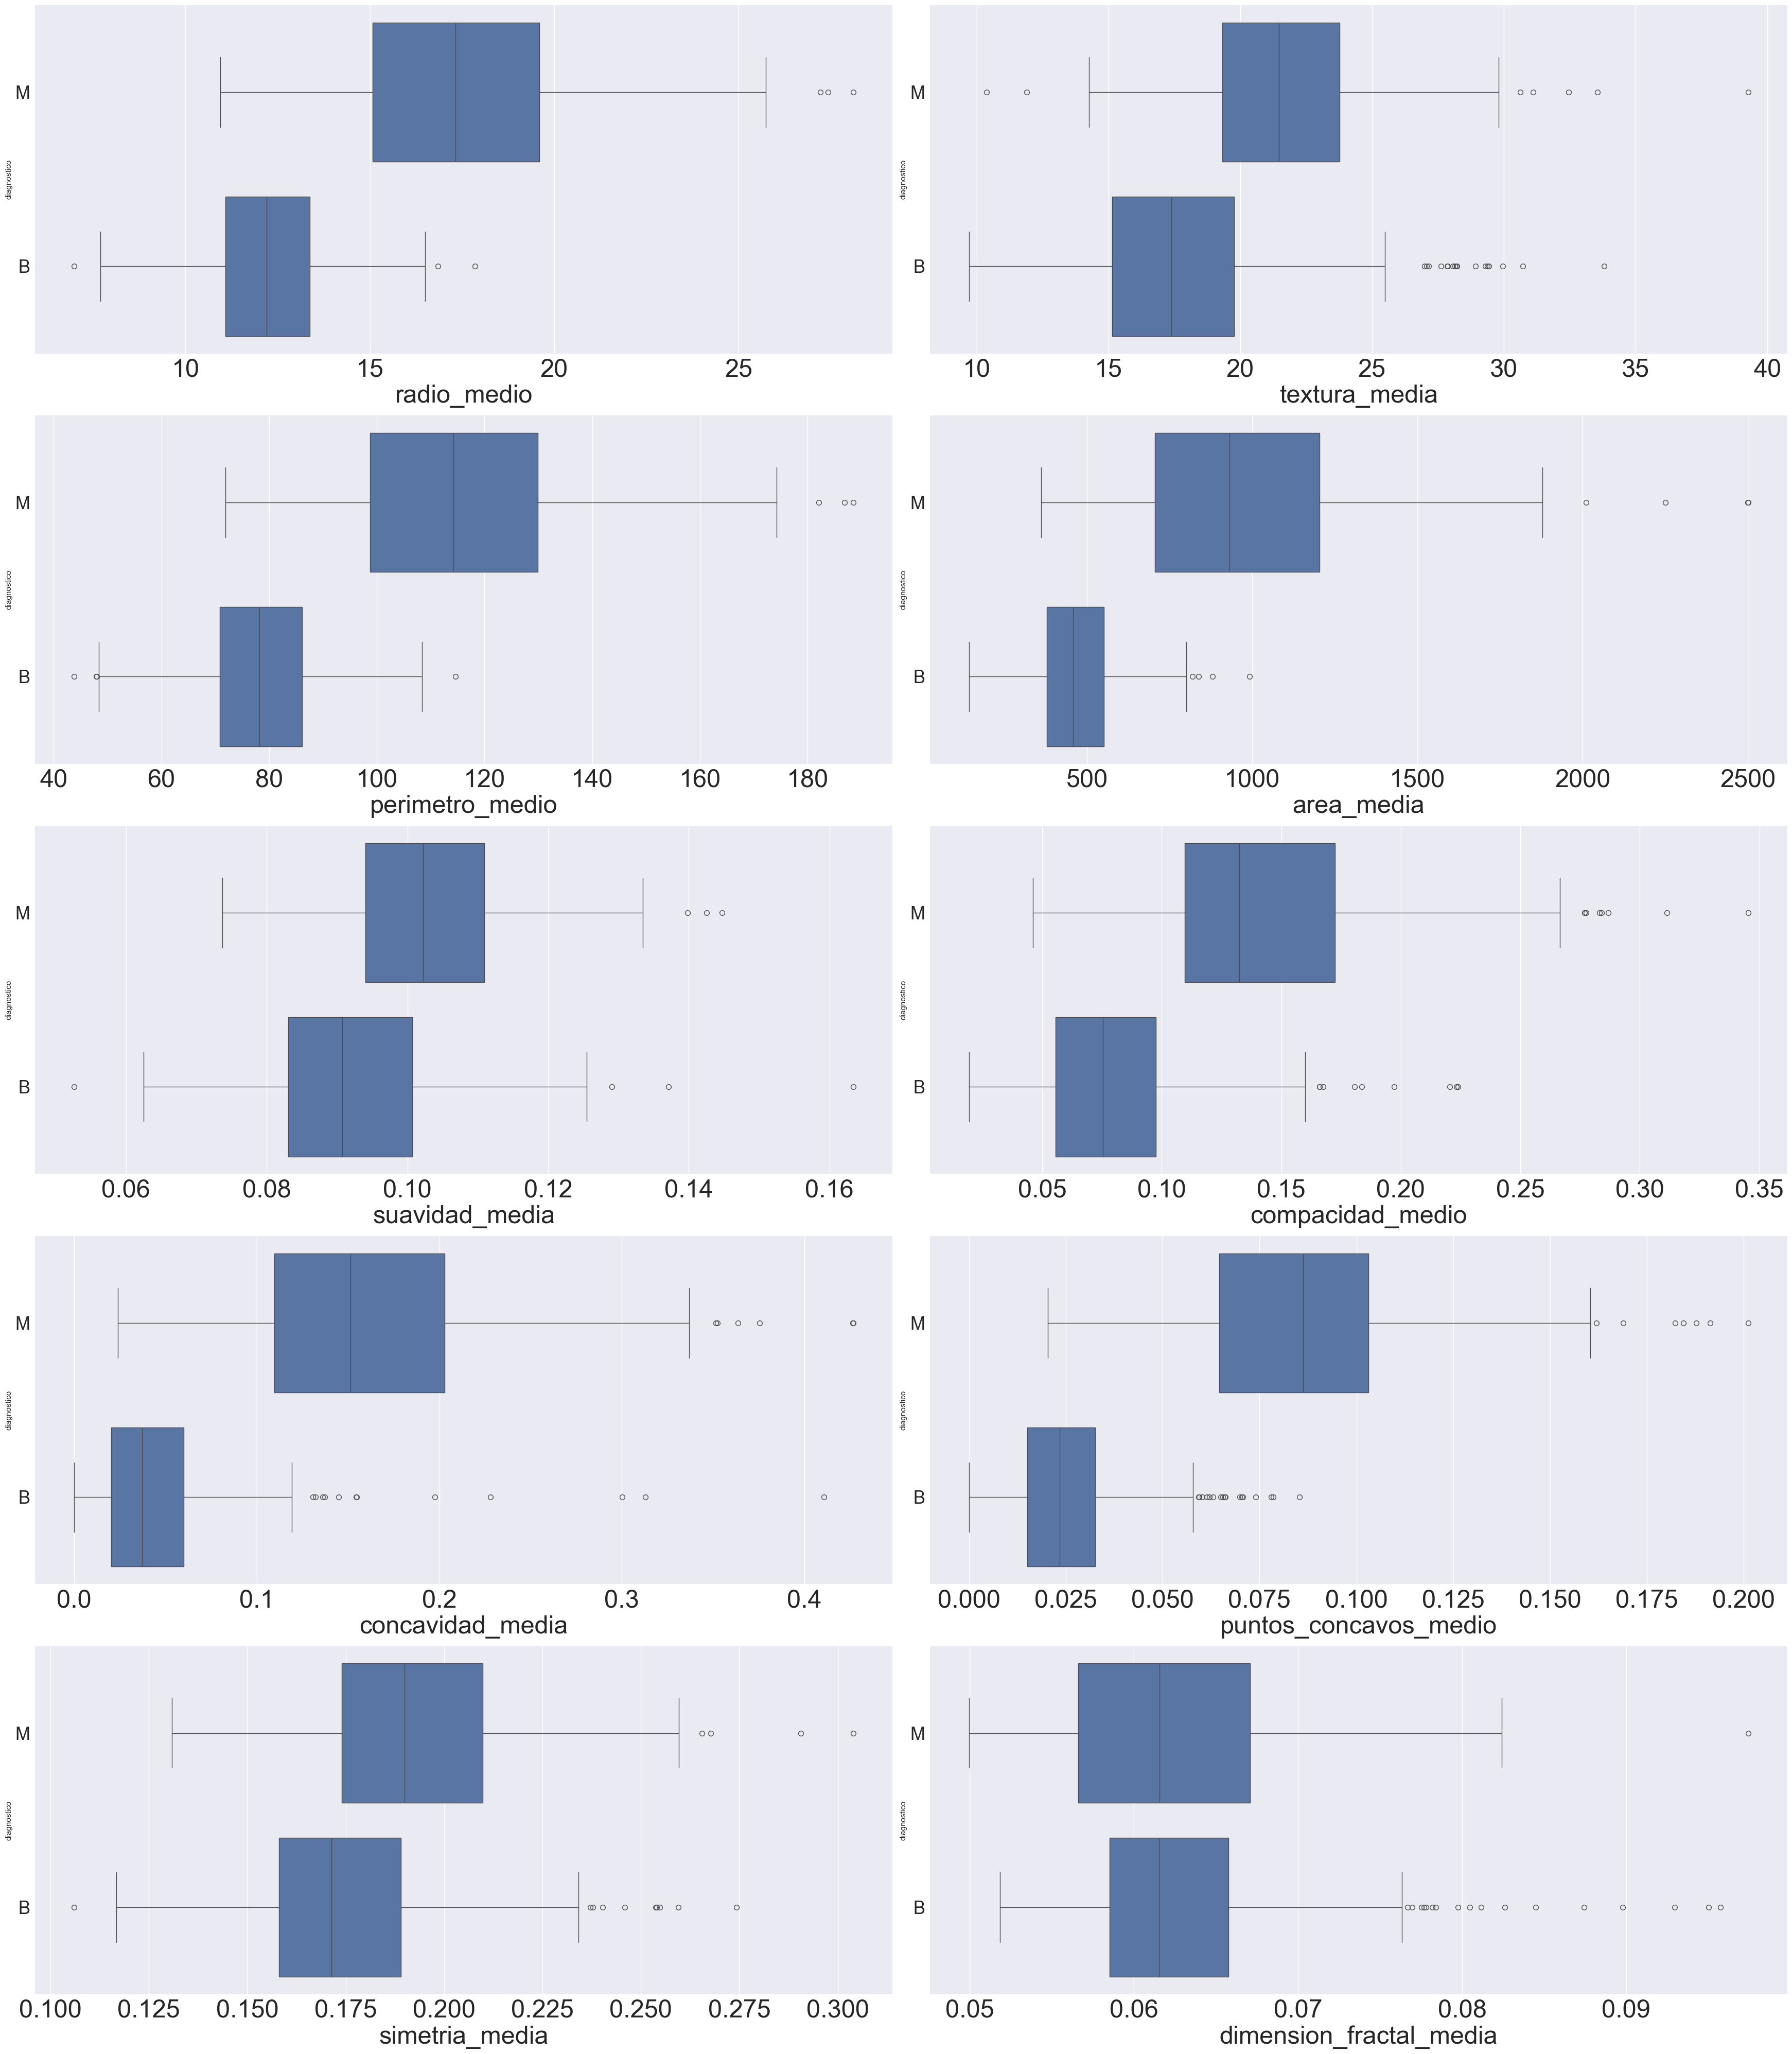

In [11]:
# Crear una cuadrícula de subgráficos con 2 columnas y 5 filas
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(35, 40), dpi=100)
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas del subconjunto df_viz1 para crear gráficos de caja
for i, col in enumerate(df_viz1.columns[:-1]):  # Excluir la columna 'diagnóstico'
    sns.boxplot(x=col, y='diagnostico', data=df_viz1, ax=axs[i]) # Crear un gráfico de caja para cada característica
    axs[i].set_xlabel(col, fontsize=35) # Establecer etiqueta x con el nombre de la característica
    axs[i].tick_params(axis='x', labelsize=35) # Ajustar el tamaño de las etiquetas x
    axs[i].tick_params(axis='y', labelsize=25) # Ajustar el tamaño de las etiquetas y

# Ajustar el diseño para una presentación más clara
plt.tight_layout()  # Ajustar el diseño para evitar la superposición
plt.show()  # Mostrar los gráficos de caja en la cuadrícula

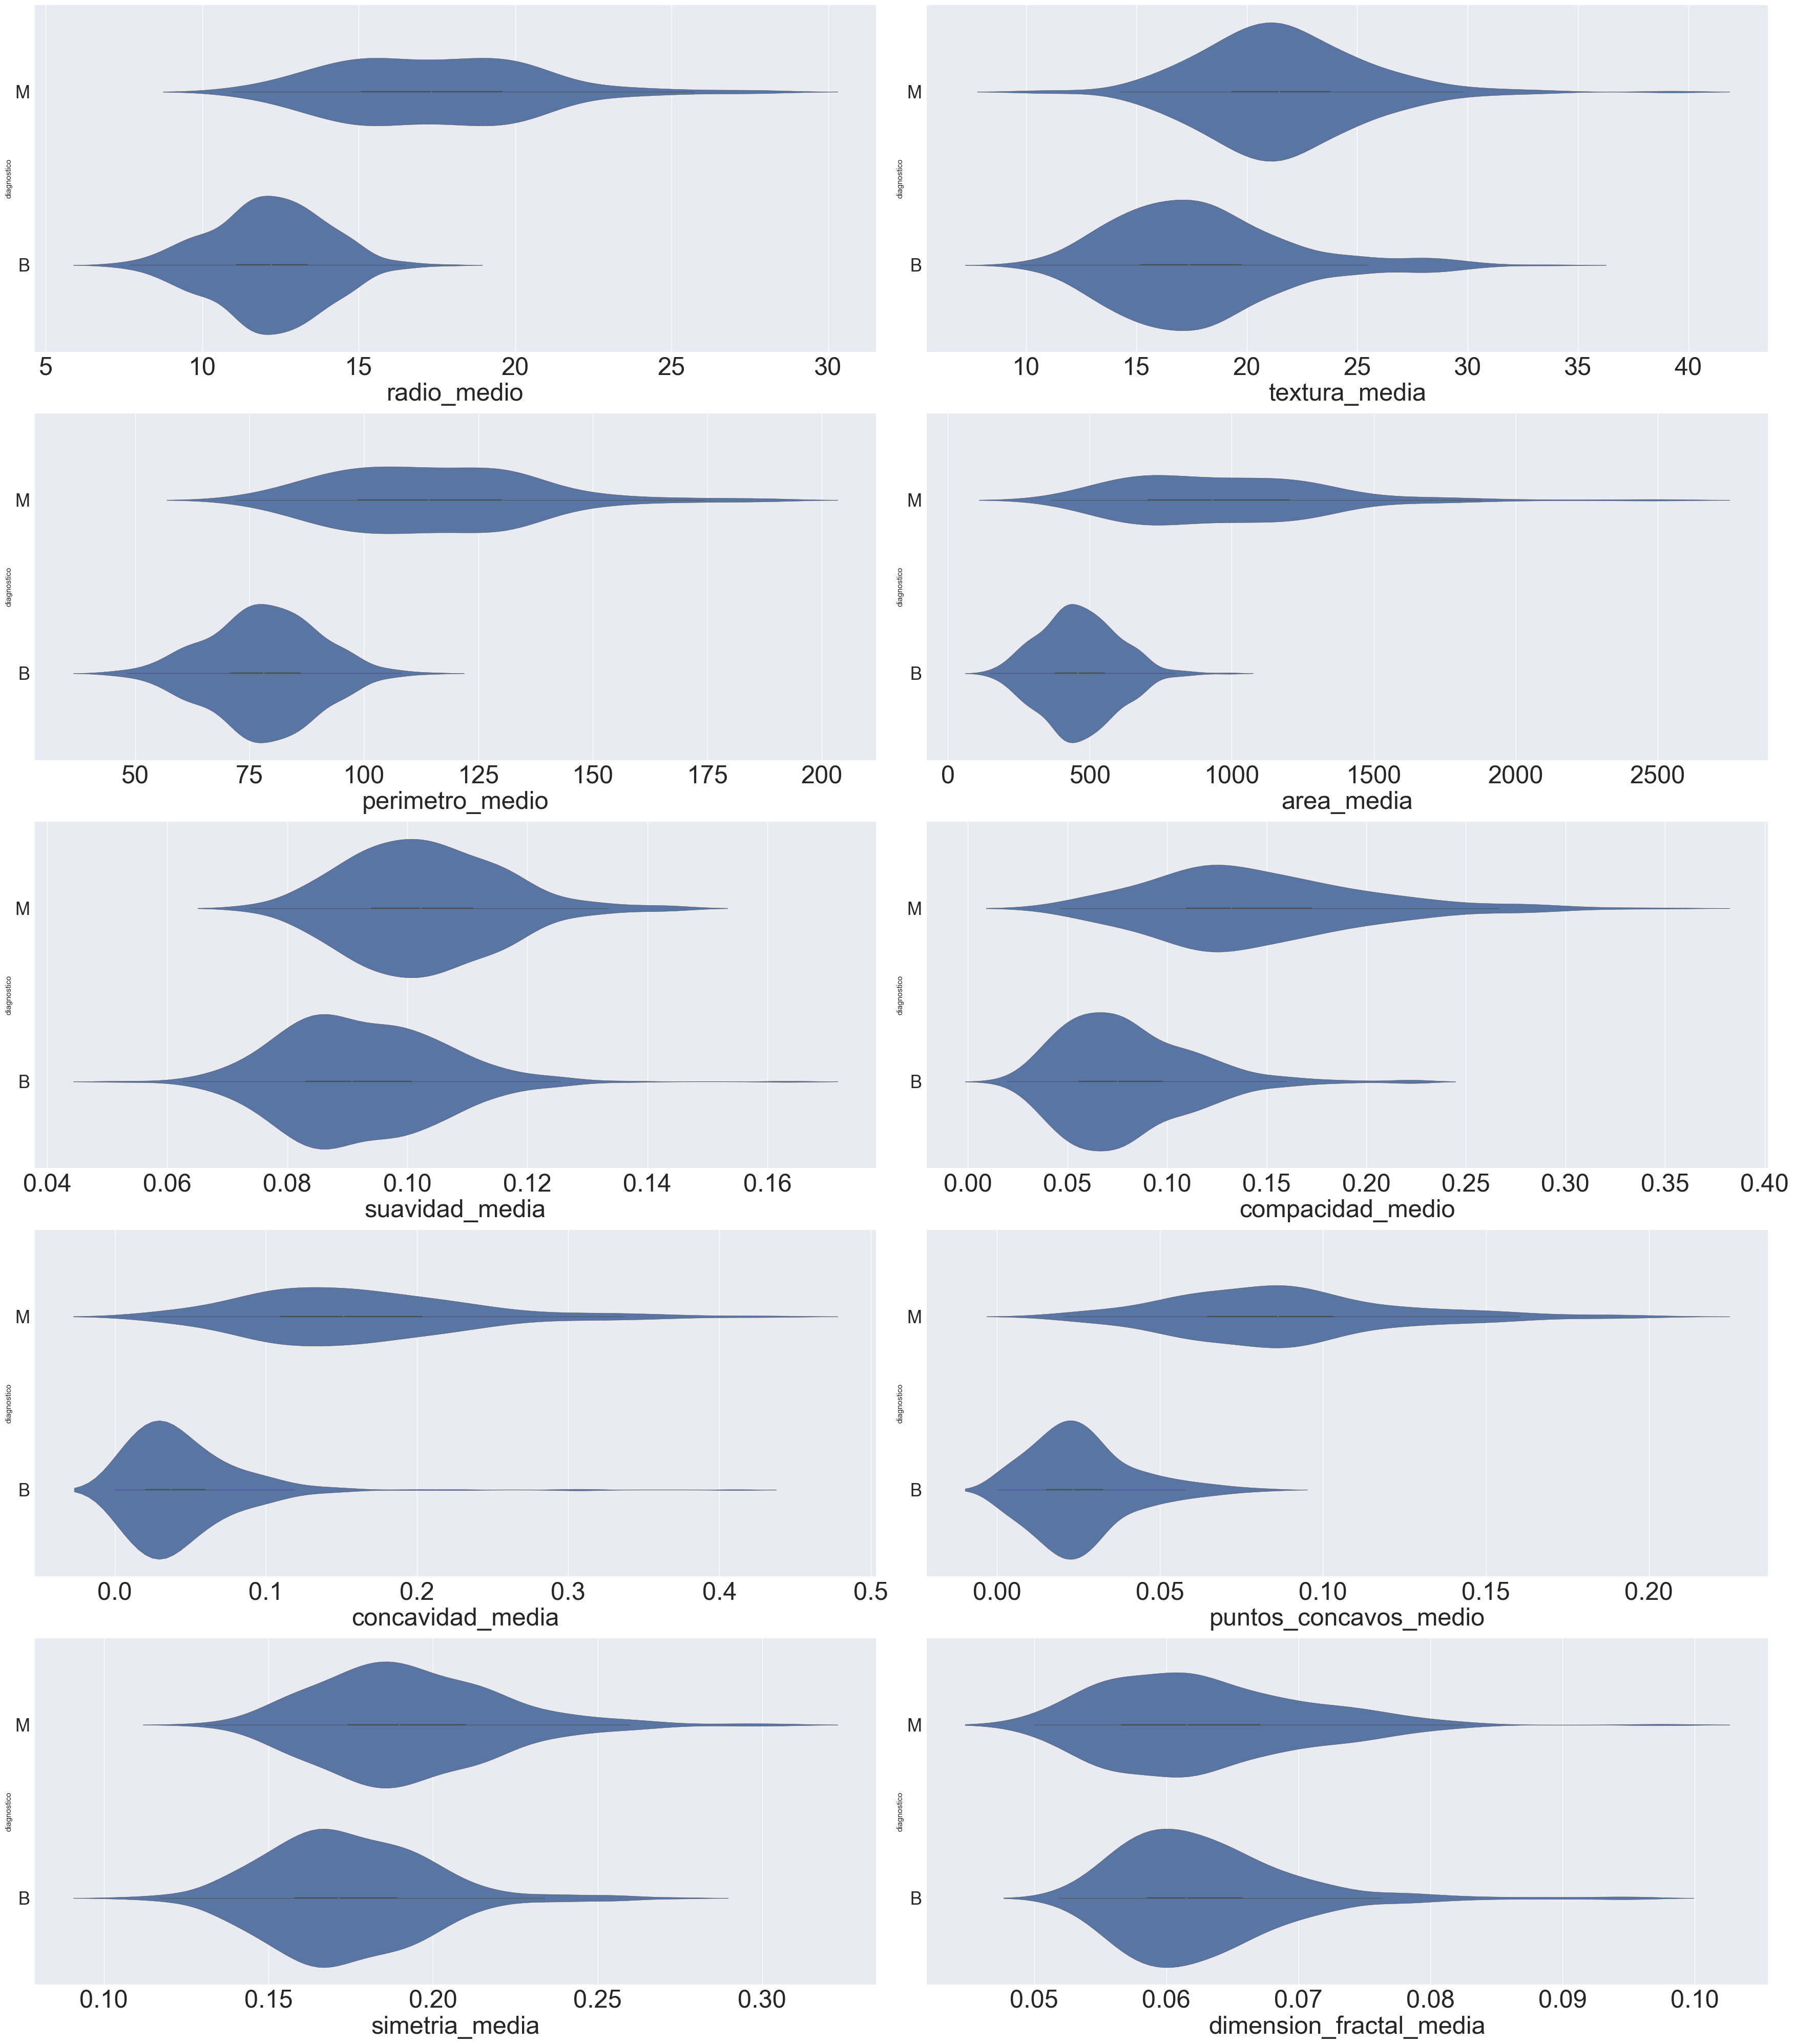

In [12]:
# Crear una cuadrícula de subgráficos con 2 columnas y 5 filas
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(35, 40), dpi=100)
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas del subconjunto df_viz1 para crear gráficos de violín
for i, col in enumerate(df_viz1.drop(columns='diagnostico').columns):
    sns.violinplot(x=col, y='diagnostico', data=df_viz1, ax=axs[i])
    axs[i].set_xlabel(col, fontsize=35)
    axs[i].tick_params(axis='x', labelsize=35)
    axs[i].tick_params(axis='y', labelsize=25)

# Ajustar el diseño para una presentación más clara
plt.tight_layout()
plt.show()

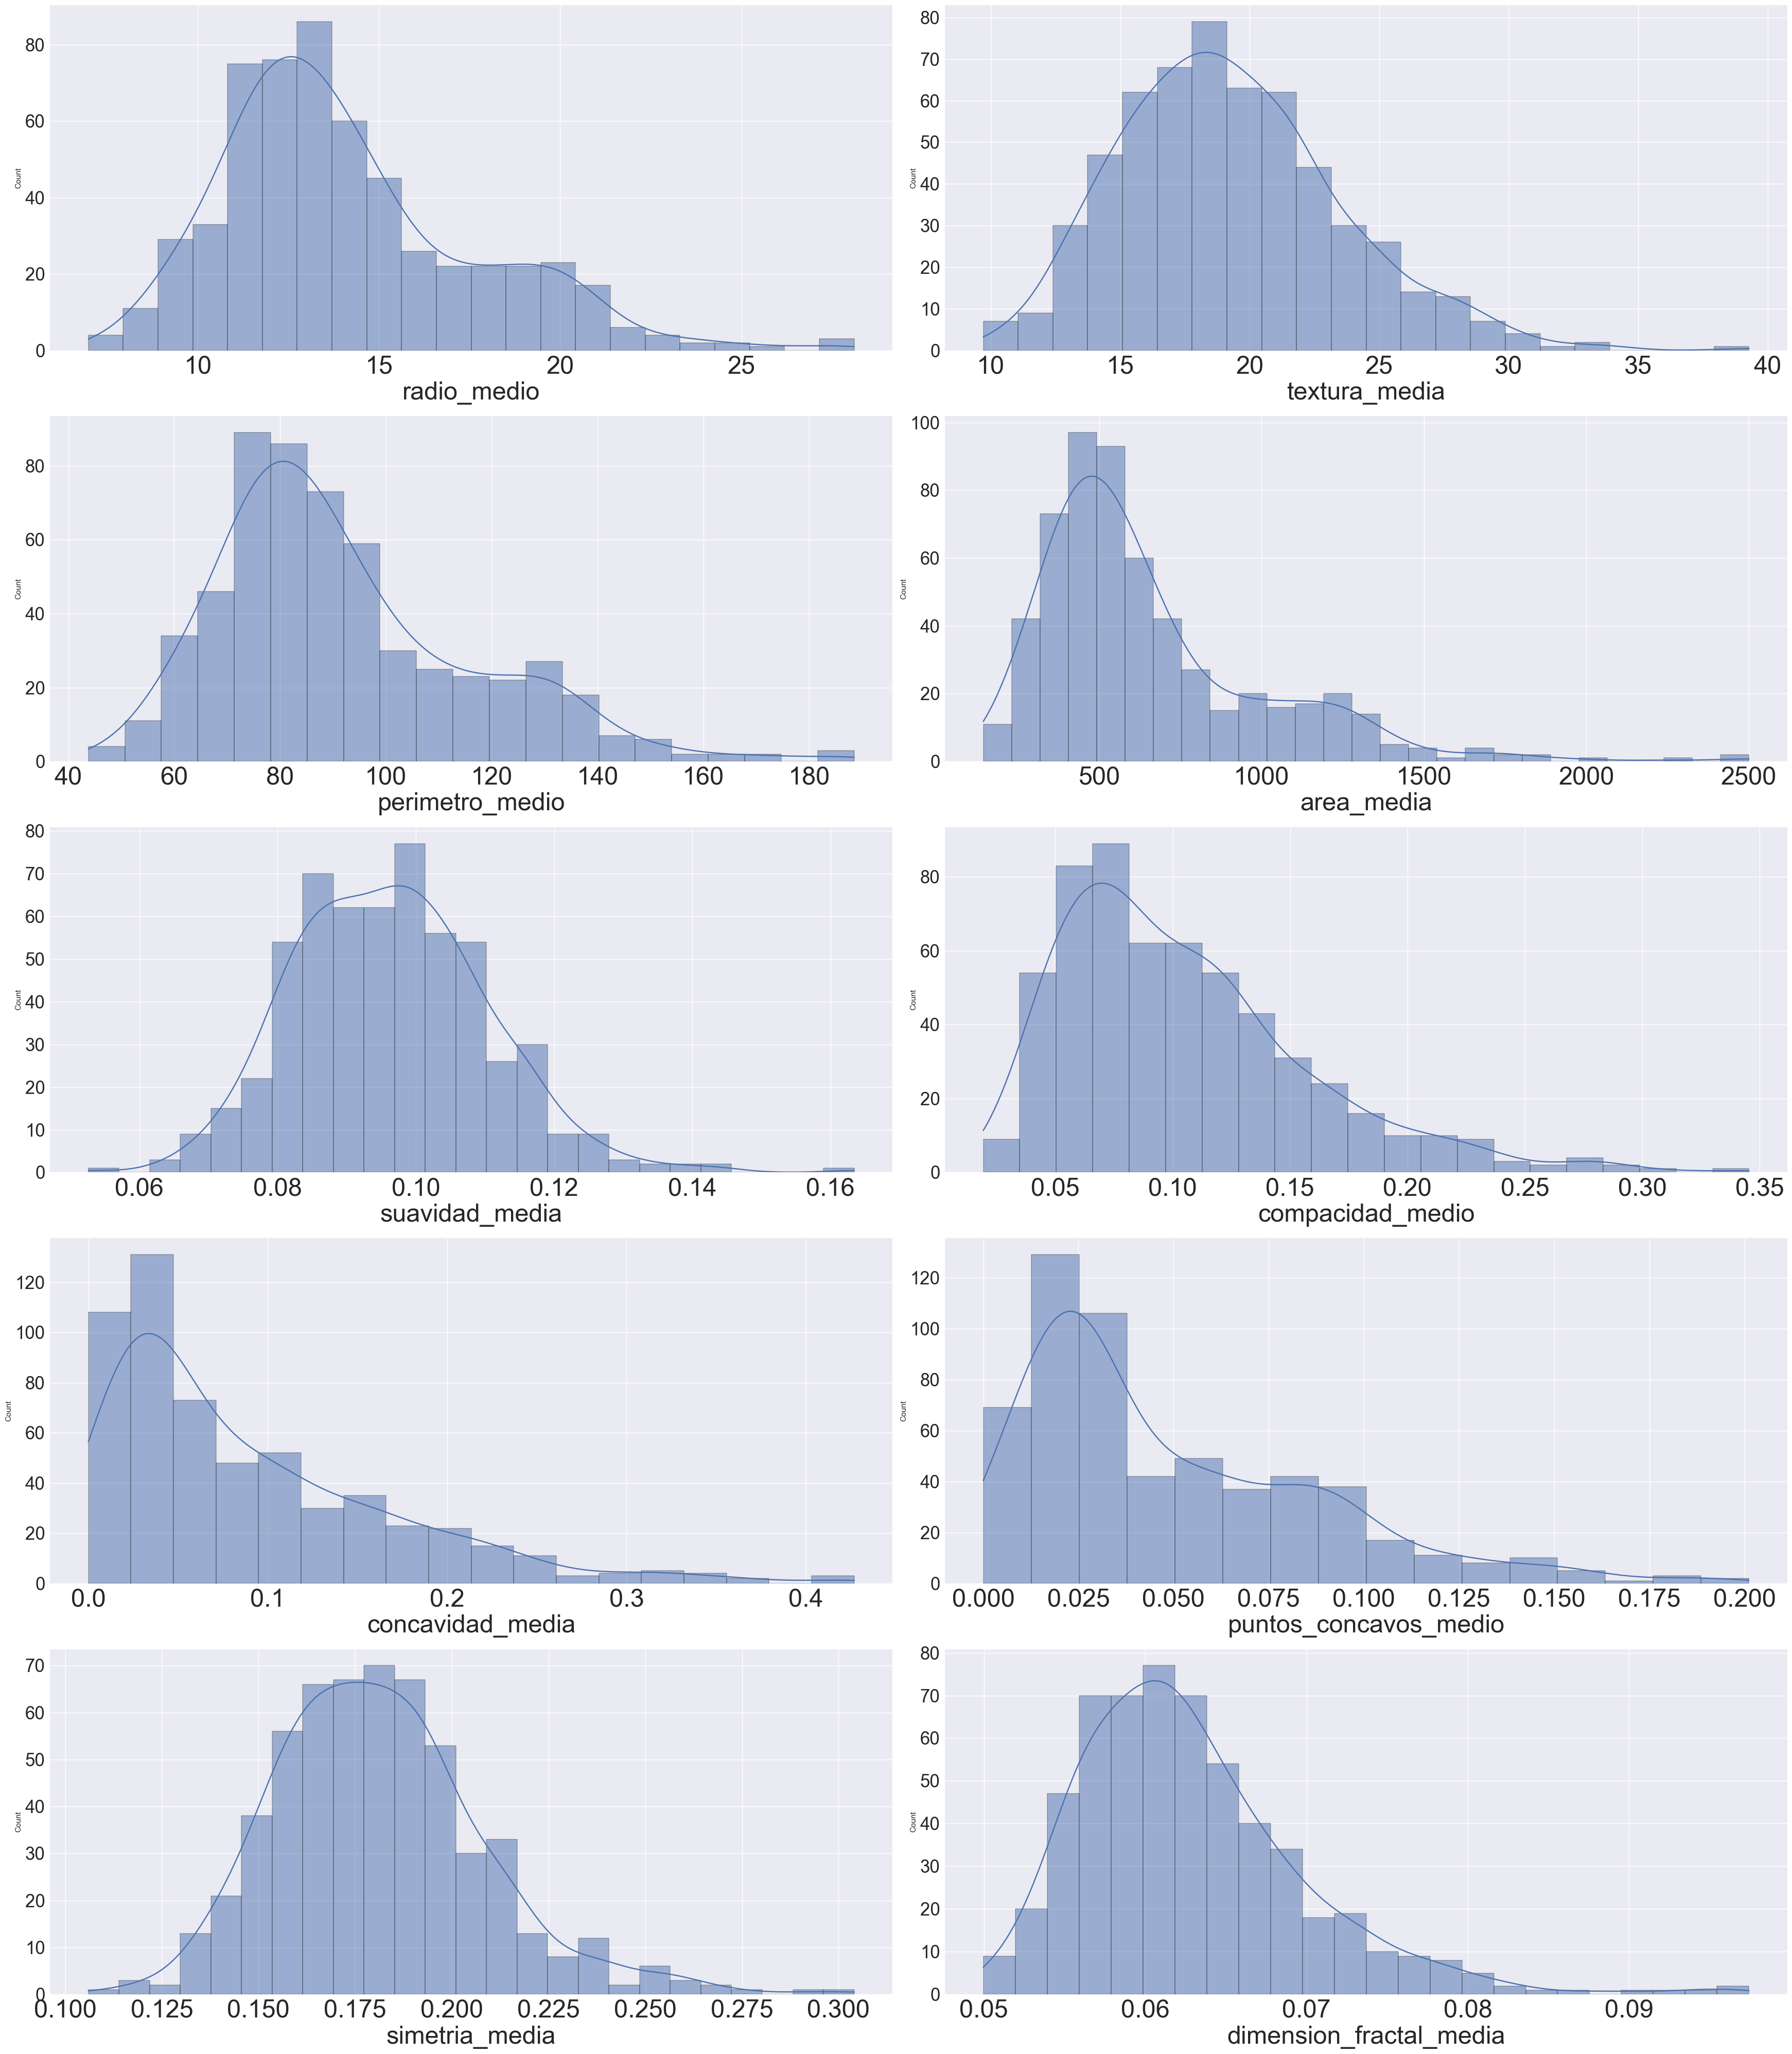

In [13]:
# Crear una cuadrícula de subgráficos con 2 columnas y 5 filas
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(35, 40), dpi=100)
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas del subconjunto df_viz1 para crear histogramas
for i, col in enumerate(df_viz1.drop(columns='diagnostico').columns):
    sns.histplot(x=col, data=df_viz1, kde=True, ax=axs[i])
    axs[i].set_xlabel(col, fontsize=35)
    axs[i].tick_params(axis='x', labelsize=35)
    axs[i].tick_params(axis='y', labelsize=25)
    
# Ajustar el diseño para una presentación más clara
plt.tight_layout()
plt.show()


# Análisis del 2° subconjunto de datos del Dataset principal

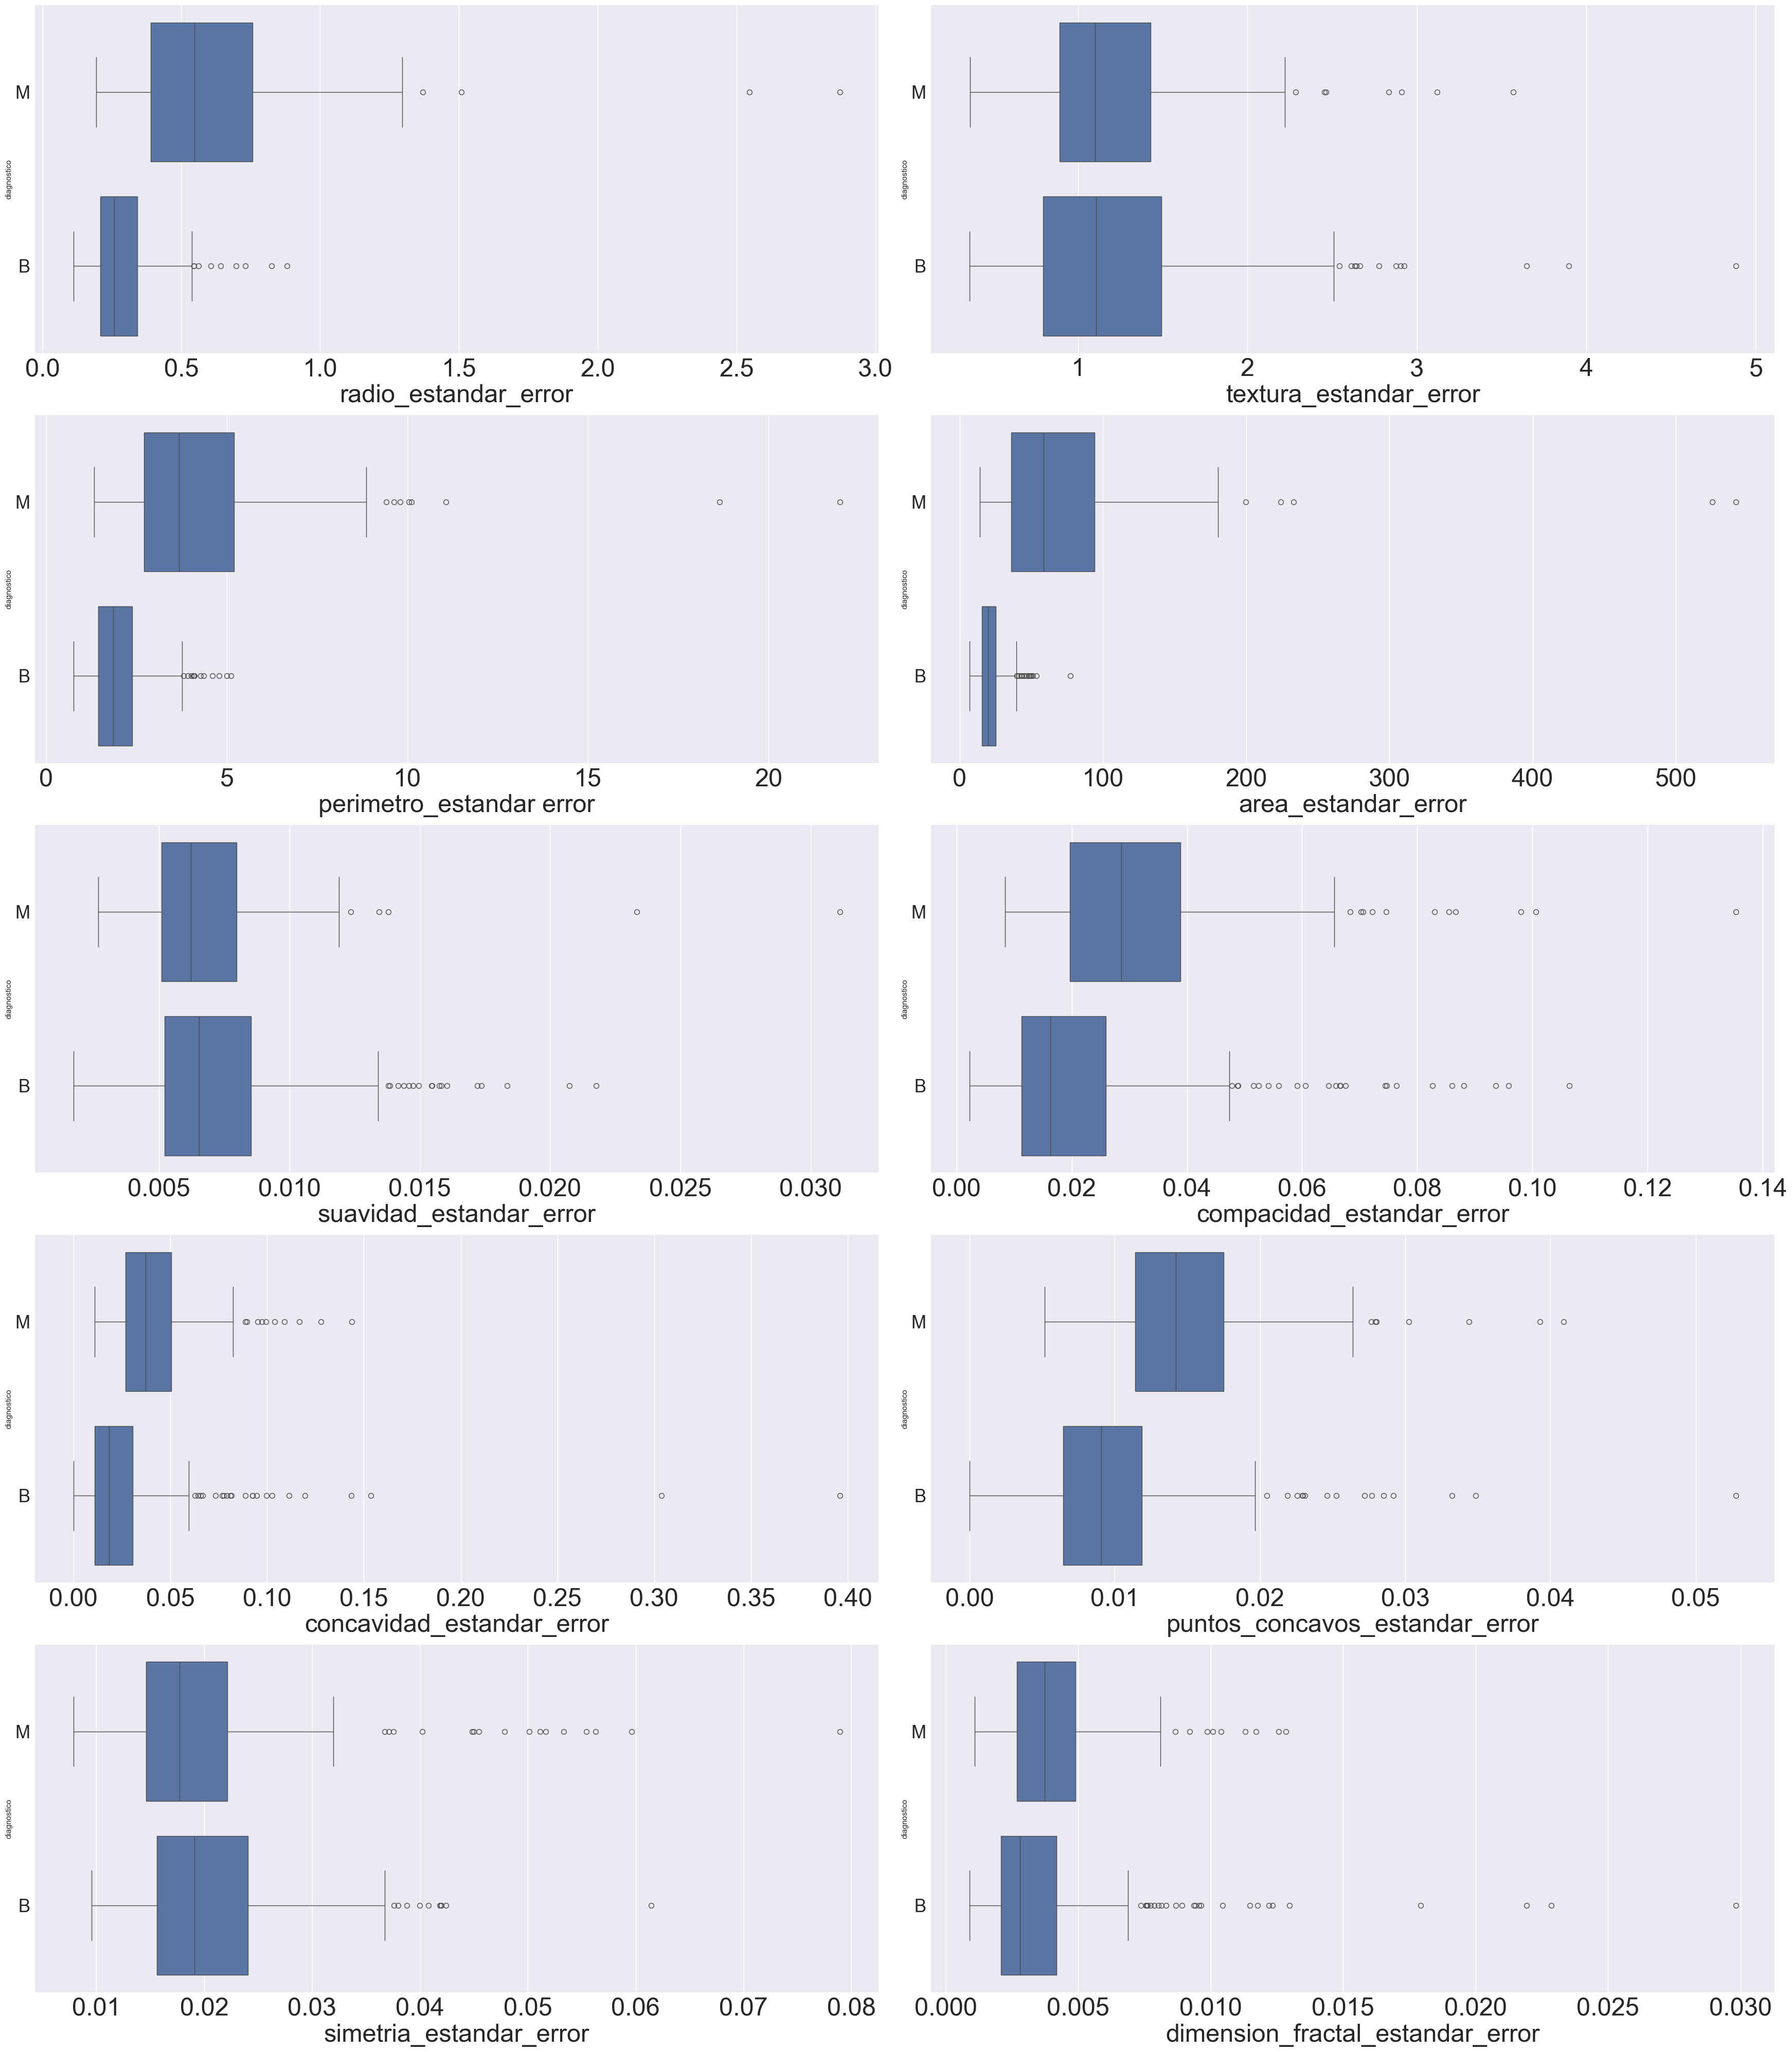

In [14]:
# Crear una cuadrícula de subgráficos con 2 columnas y 5 filas
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(35, 40), dpi=100)
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas del subconjunto df_viz2 para crear gráficos de caja
for i, col in enumerate(df_viz2.drop(columns='diagnostico').columns):
    sns.boxplot(x=col, y='diagnostico', data=df_viz2, ax=axs[i])  # Gráfico de caja para cada característica
    axs[i].set_xlabel(col, fontsize=35)  # Etiqueta x con el nombre de la característica
    axs[i].tick_params(axis='x', labelsize=35)  # Ajustar el tamaño de las etiquetas x
    axs[i].tick_params(axis='y', labelsize=25)  # Ajustar el tamaño de las etiquetas y

# Ajustar el diseño para una presentación más clara
plt.tight_layout()  # Ajustar el diseño para evitar la superposición
plt.show()  # Mostrar los gráficos de caja en la cuadrícula

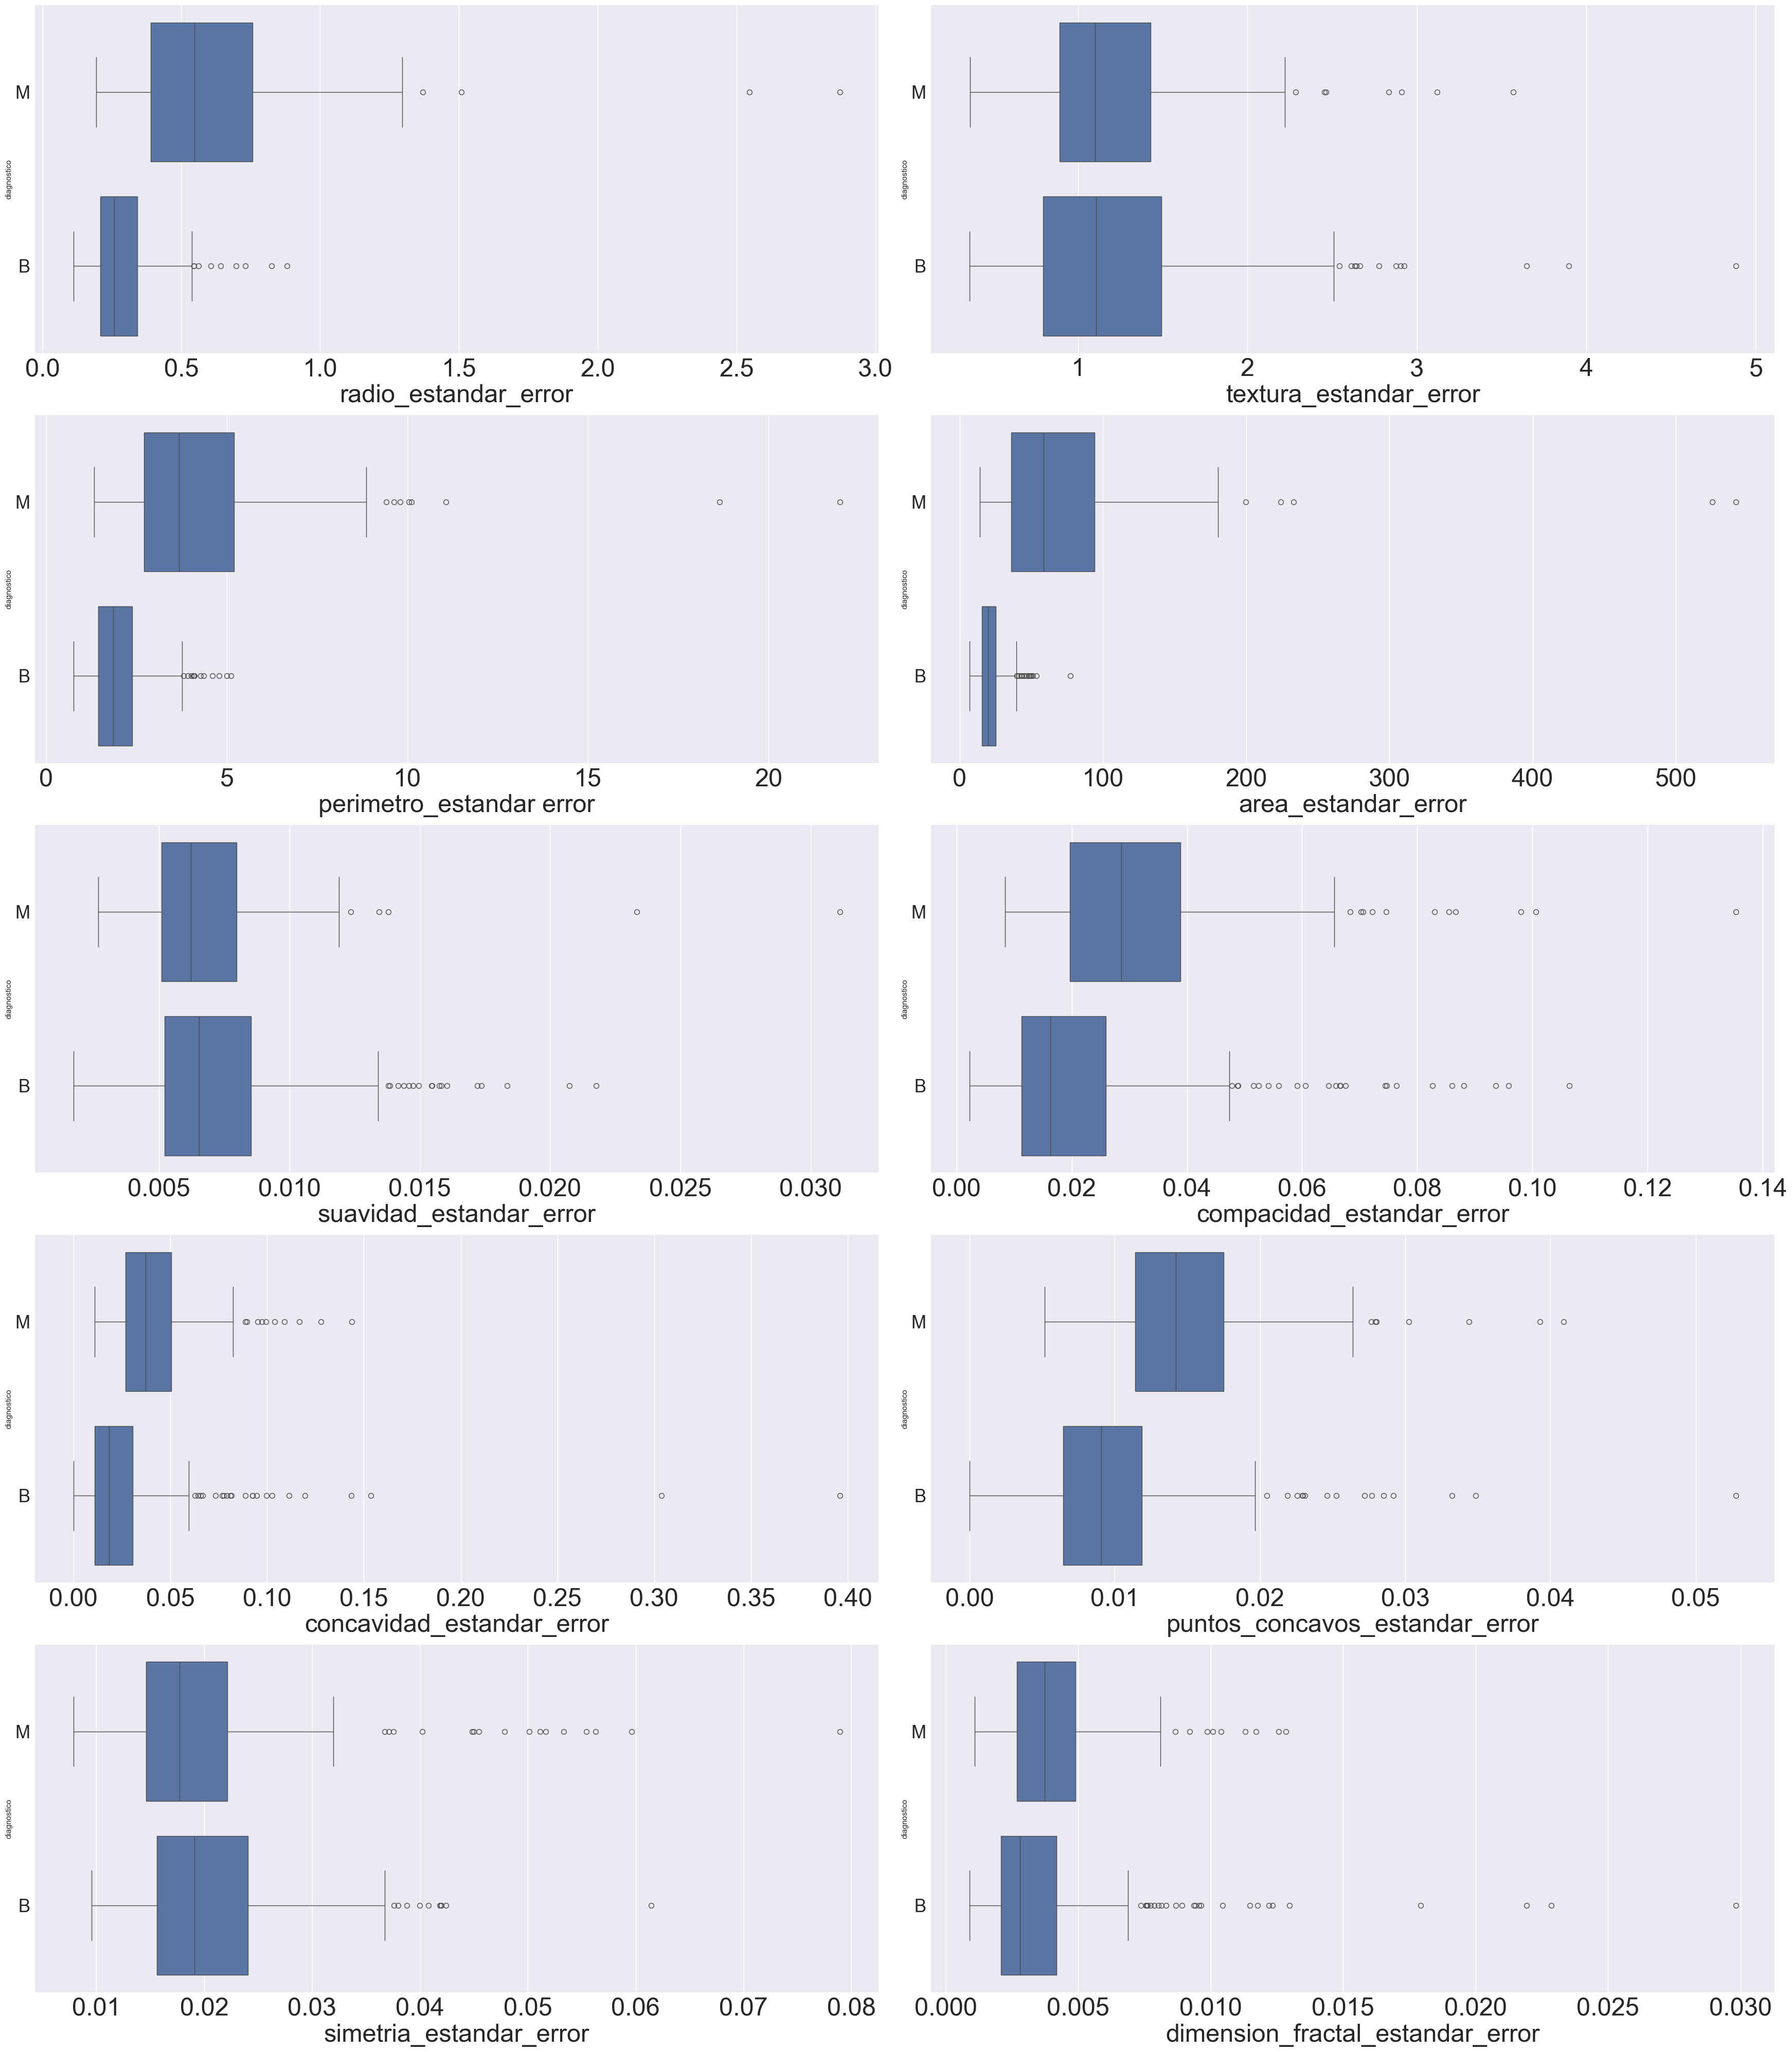

In [15]:
# Crear una cuadrícula de subgráficos con 2 columnas y 5 filas
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(35, 40), dpi=100)
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas del subconjunto df_viz2 para crear gráficos de caja
for i, col in enumerate(df_viz2.drop(columns='diagnostico').columns):
    sns.boxplot(x=col, y='diagnostico', data=df_viz2, ax=axs[i])  # Gráfico de caja para cada característica
    axs[i].set_xlabel(col, fontsize=35)  # Etiqueta x con el nombre de la característica
    axs[i].tick_params(axis='x', labelsize=35)  # Ajustar el tamaño de las etiquetas x
    axs[i].tick_params(axis='y', labelsize=25)  # Ajustar el tamaño de las etiquetas y

# Ajustar el diseño para una presentación más clara
plt.tight_layout()  # Ajustar el diseño para evitar la superposición
plt.show()  # Mostrar los gráficos de caja en la cuadrícula

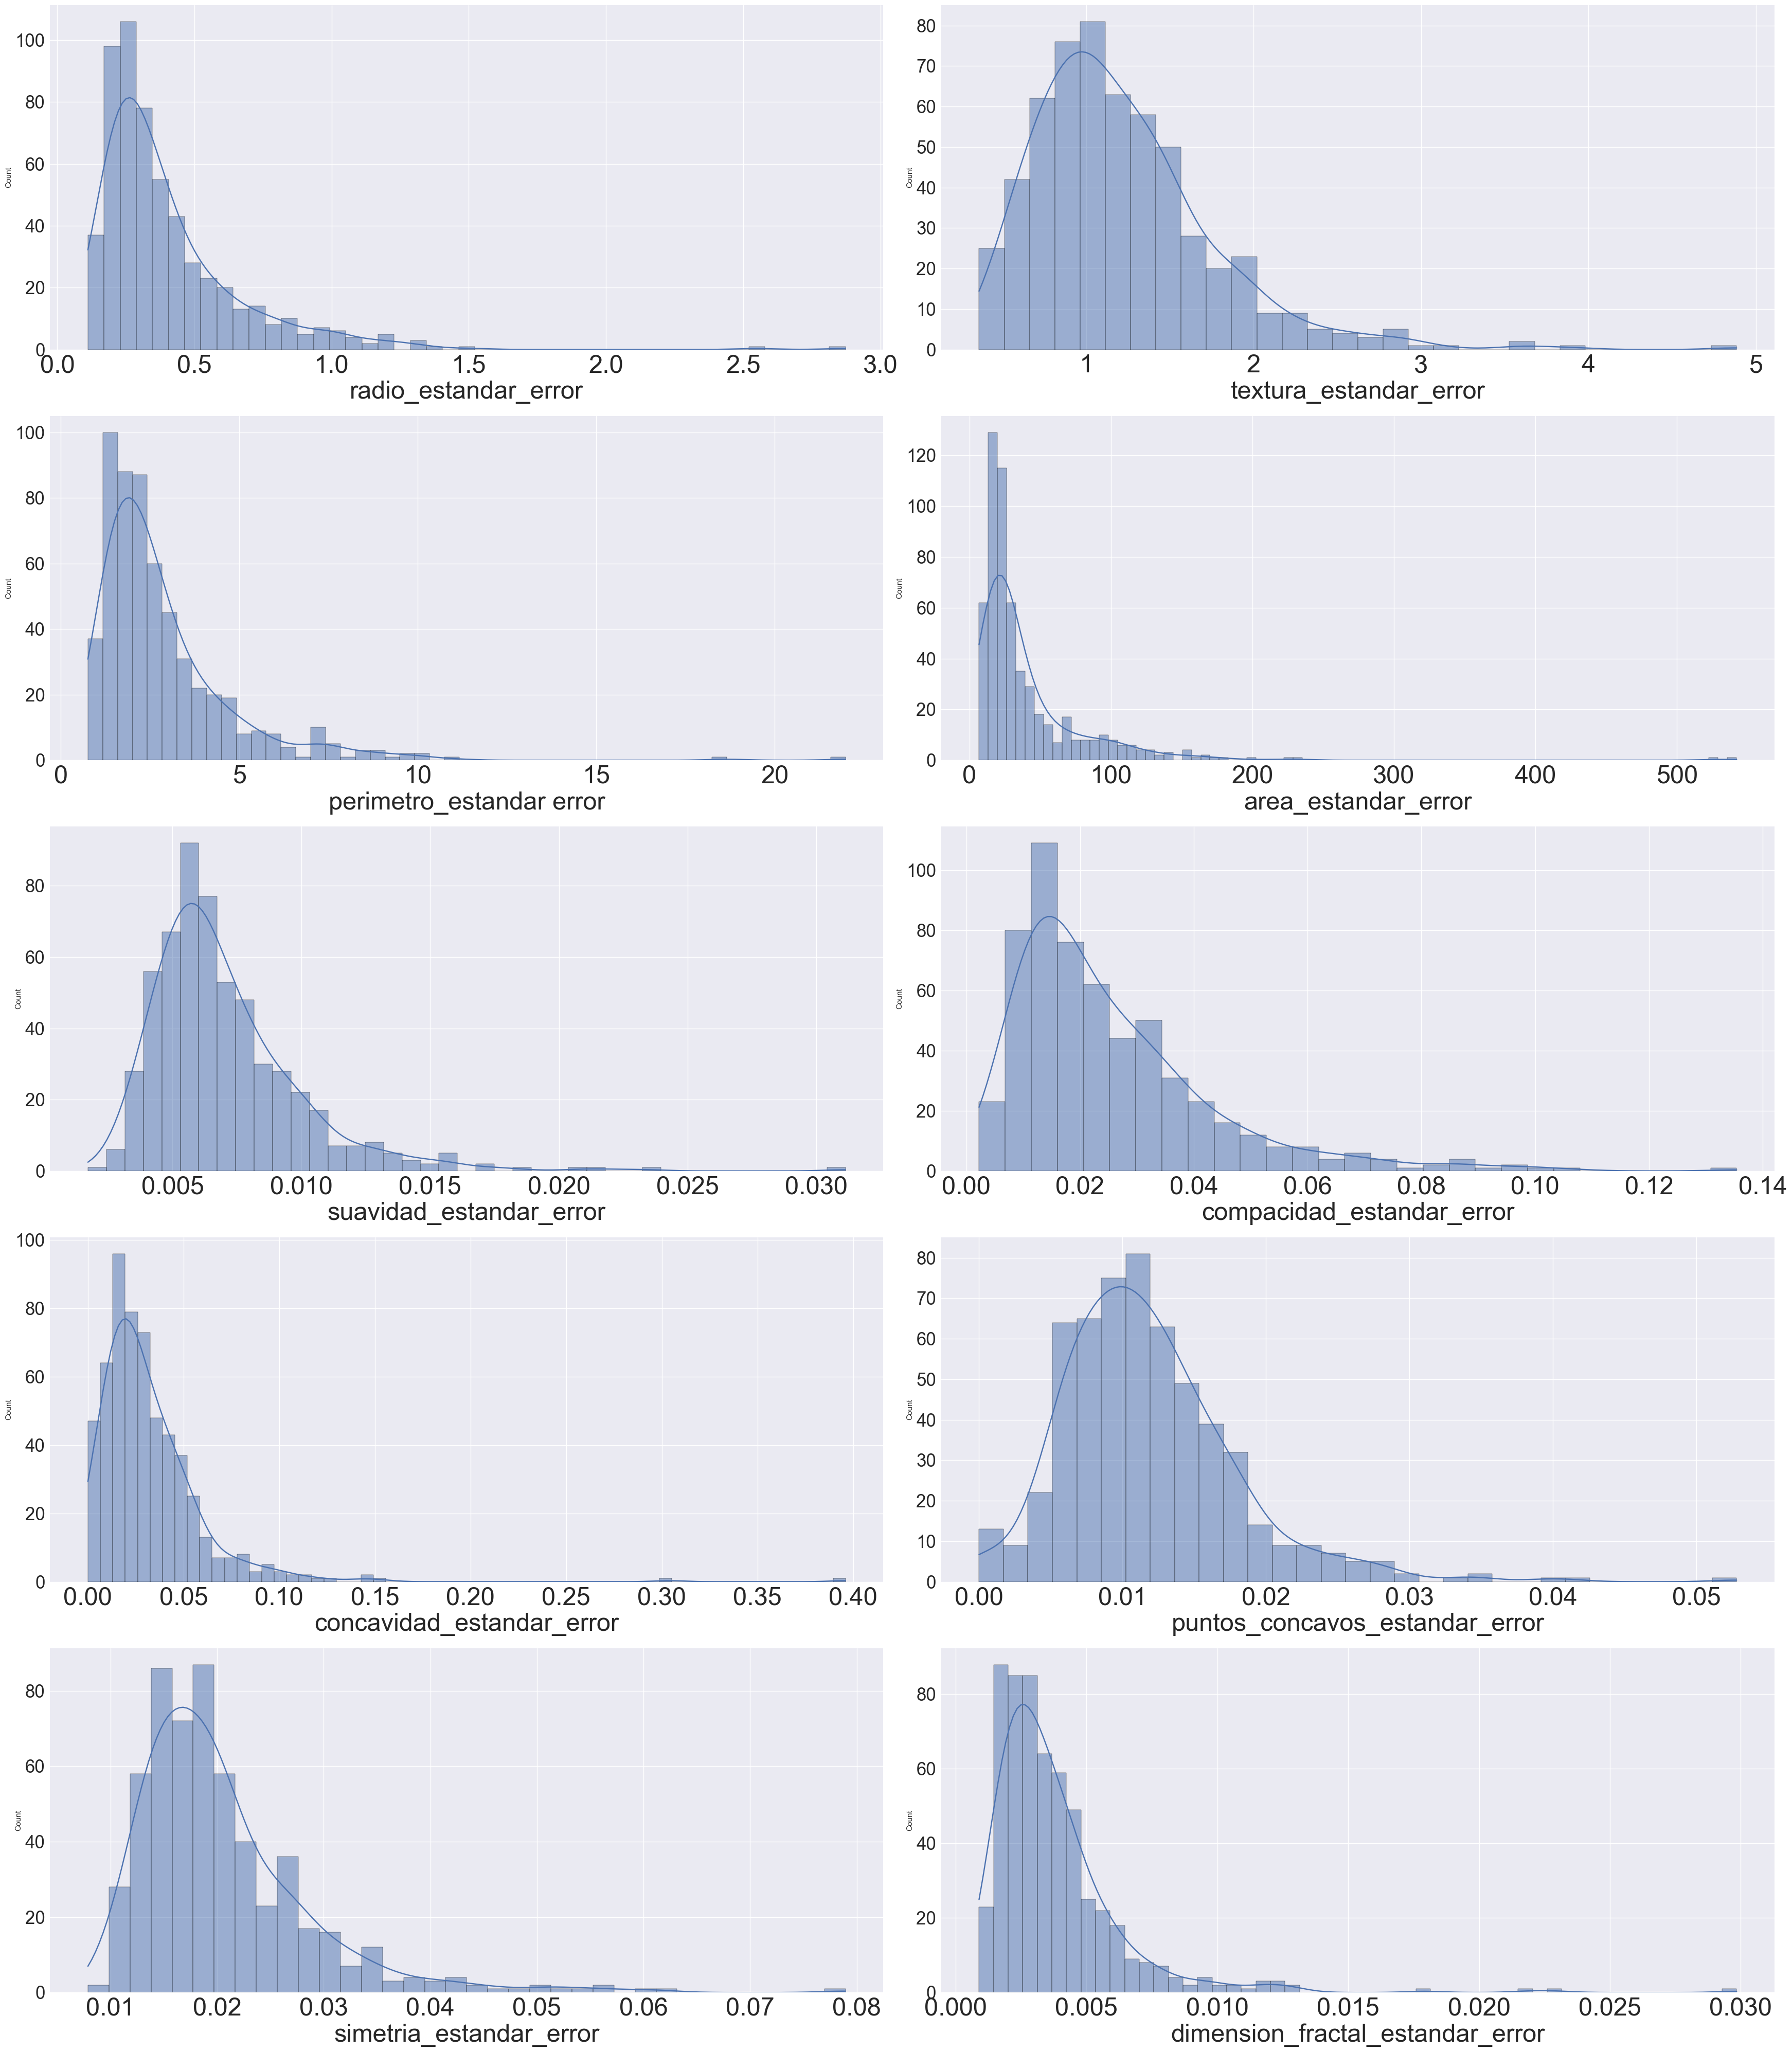

In [16]:
# Crear una cuadrícula de subgráficos con 2 columnas y 5 filas
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(35, 40), dpi=100)
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas del subconjunto df_viz2 para crear histogramas con kde
for i, col in enumerate(df_viz2.drop(columns='diagnostico').columns):
    sns.histplot(x=col, data=df_viz2, kde=True, ax=axs[i])  # Histograma con kde para cada característica
    axs[i].set_xlabel(col, fontsize=35)  # Etiqueta x con el nombre de la característica
    axs[i].tick_params(axis='x', labelsize=35)  # Ajustar el tamaño de las etiquetas x
    axs[i].tick_params(axis='y', labelsize=25)  # Ajustar el tamaño de las etiquetas y

# Ajustar el diseño para una presentación más clara
plt.tight_layout()  # Ajustar el diseño para evitar la superposición
plt.show()  # Mostrar los histogramas en la cuadrícula

# Análisis del 3°subconjunto de datos del Dataset principal

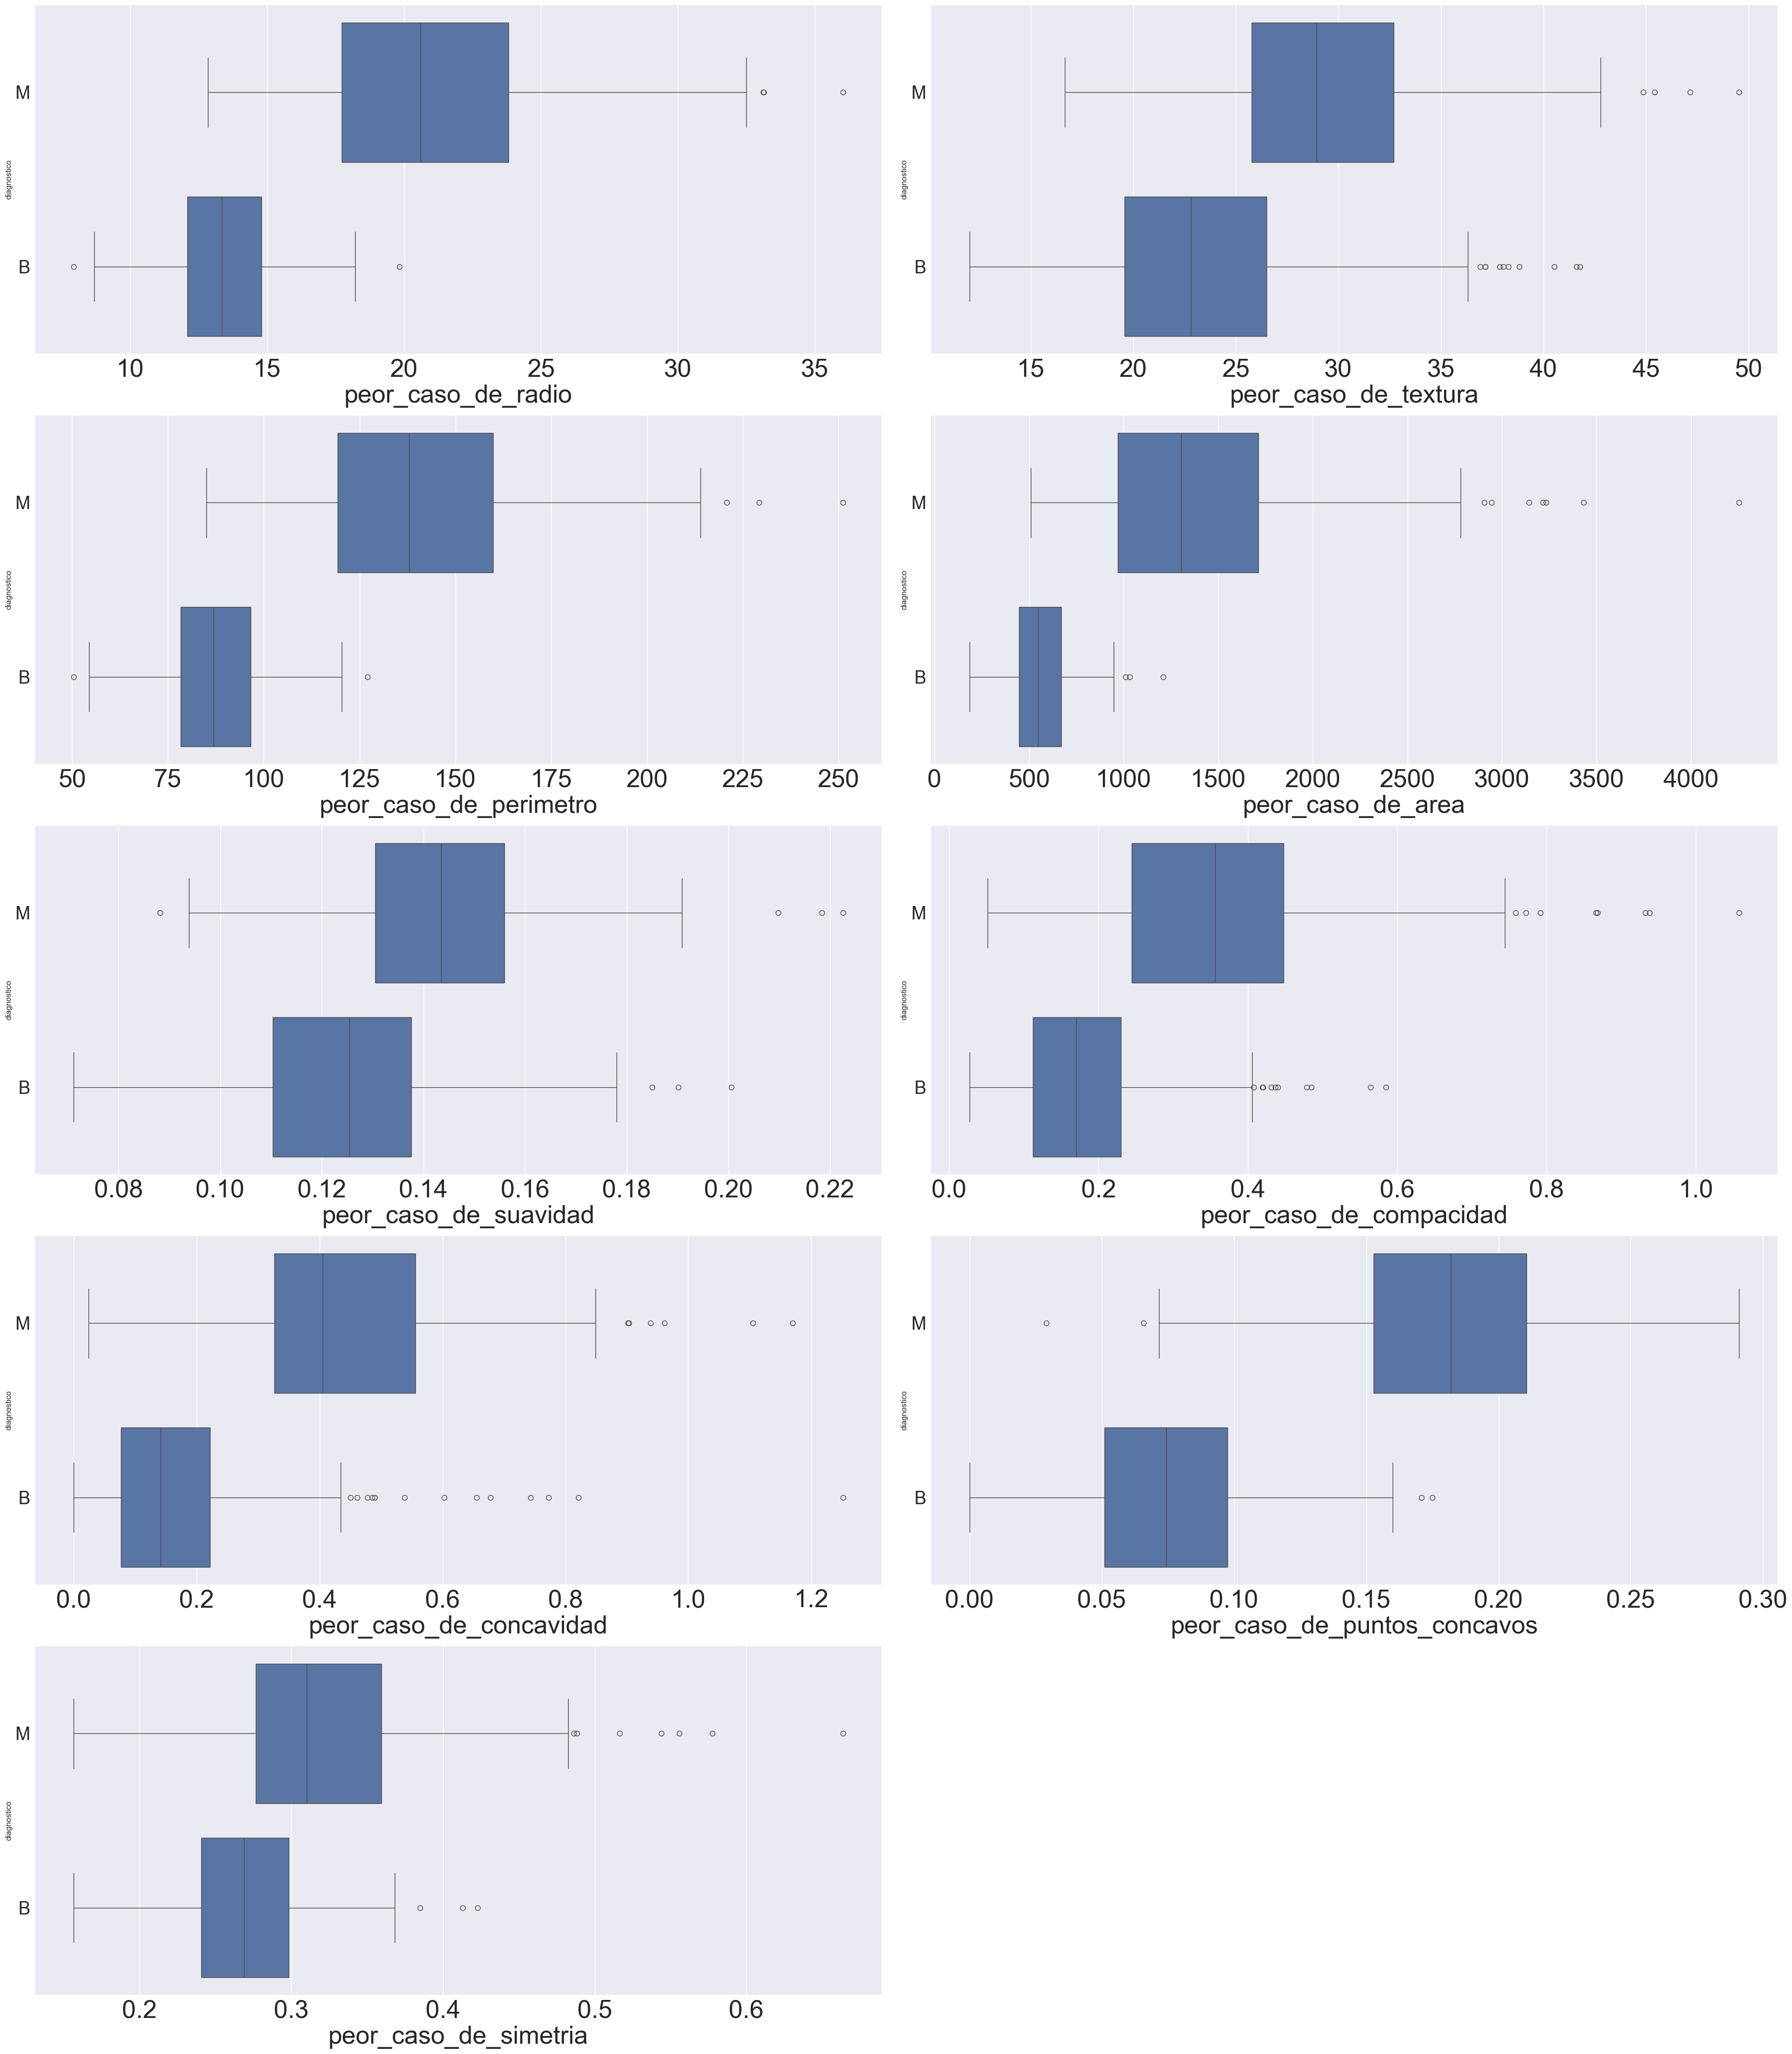

In [17]:
# Crear una cuadrícula de subgráficos con 2 columnas y 5 filas
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(35, 40), dpi=100)
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas del subconjunto df_viz3 para crear gráficos de caja
for i, col in enumerate(df_viz3.drop(columns='diagnostico').columns):
    sns.boxplot(x=col, y='diagnostico', data=df_viz3, ax=axs[i])  # Gráfico de caja para cada característica
    axs[i].set_xlabel(col, fontsize=35)  # Etiqueta x con el nombre de la característica
    axs[i].tick_params(axis='x', labelsize=35)  # Ajustar el tamaño de las etiquetas x
    axs[i].tick_params(axis='y', labelsize=25)  # Ajustar el tamaño de las etiquetas y

# Ocultar el último subgráfico vacío
axs[-1].set_visible(False)

# Ajustar el diseño para una presentación más clara
plt.tight_layout()  # Ajustar el diseño para evitar la superposición
plt.show()  # Mostrar los gráficos de caja en la cuadrícula

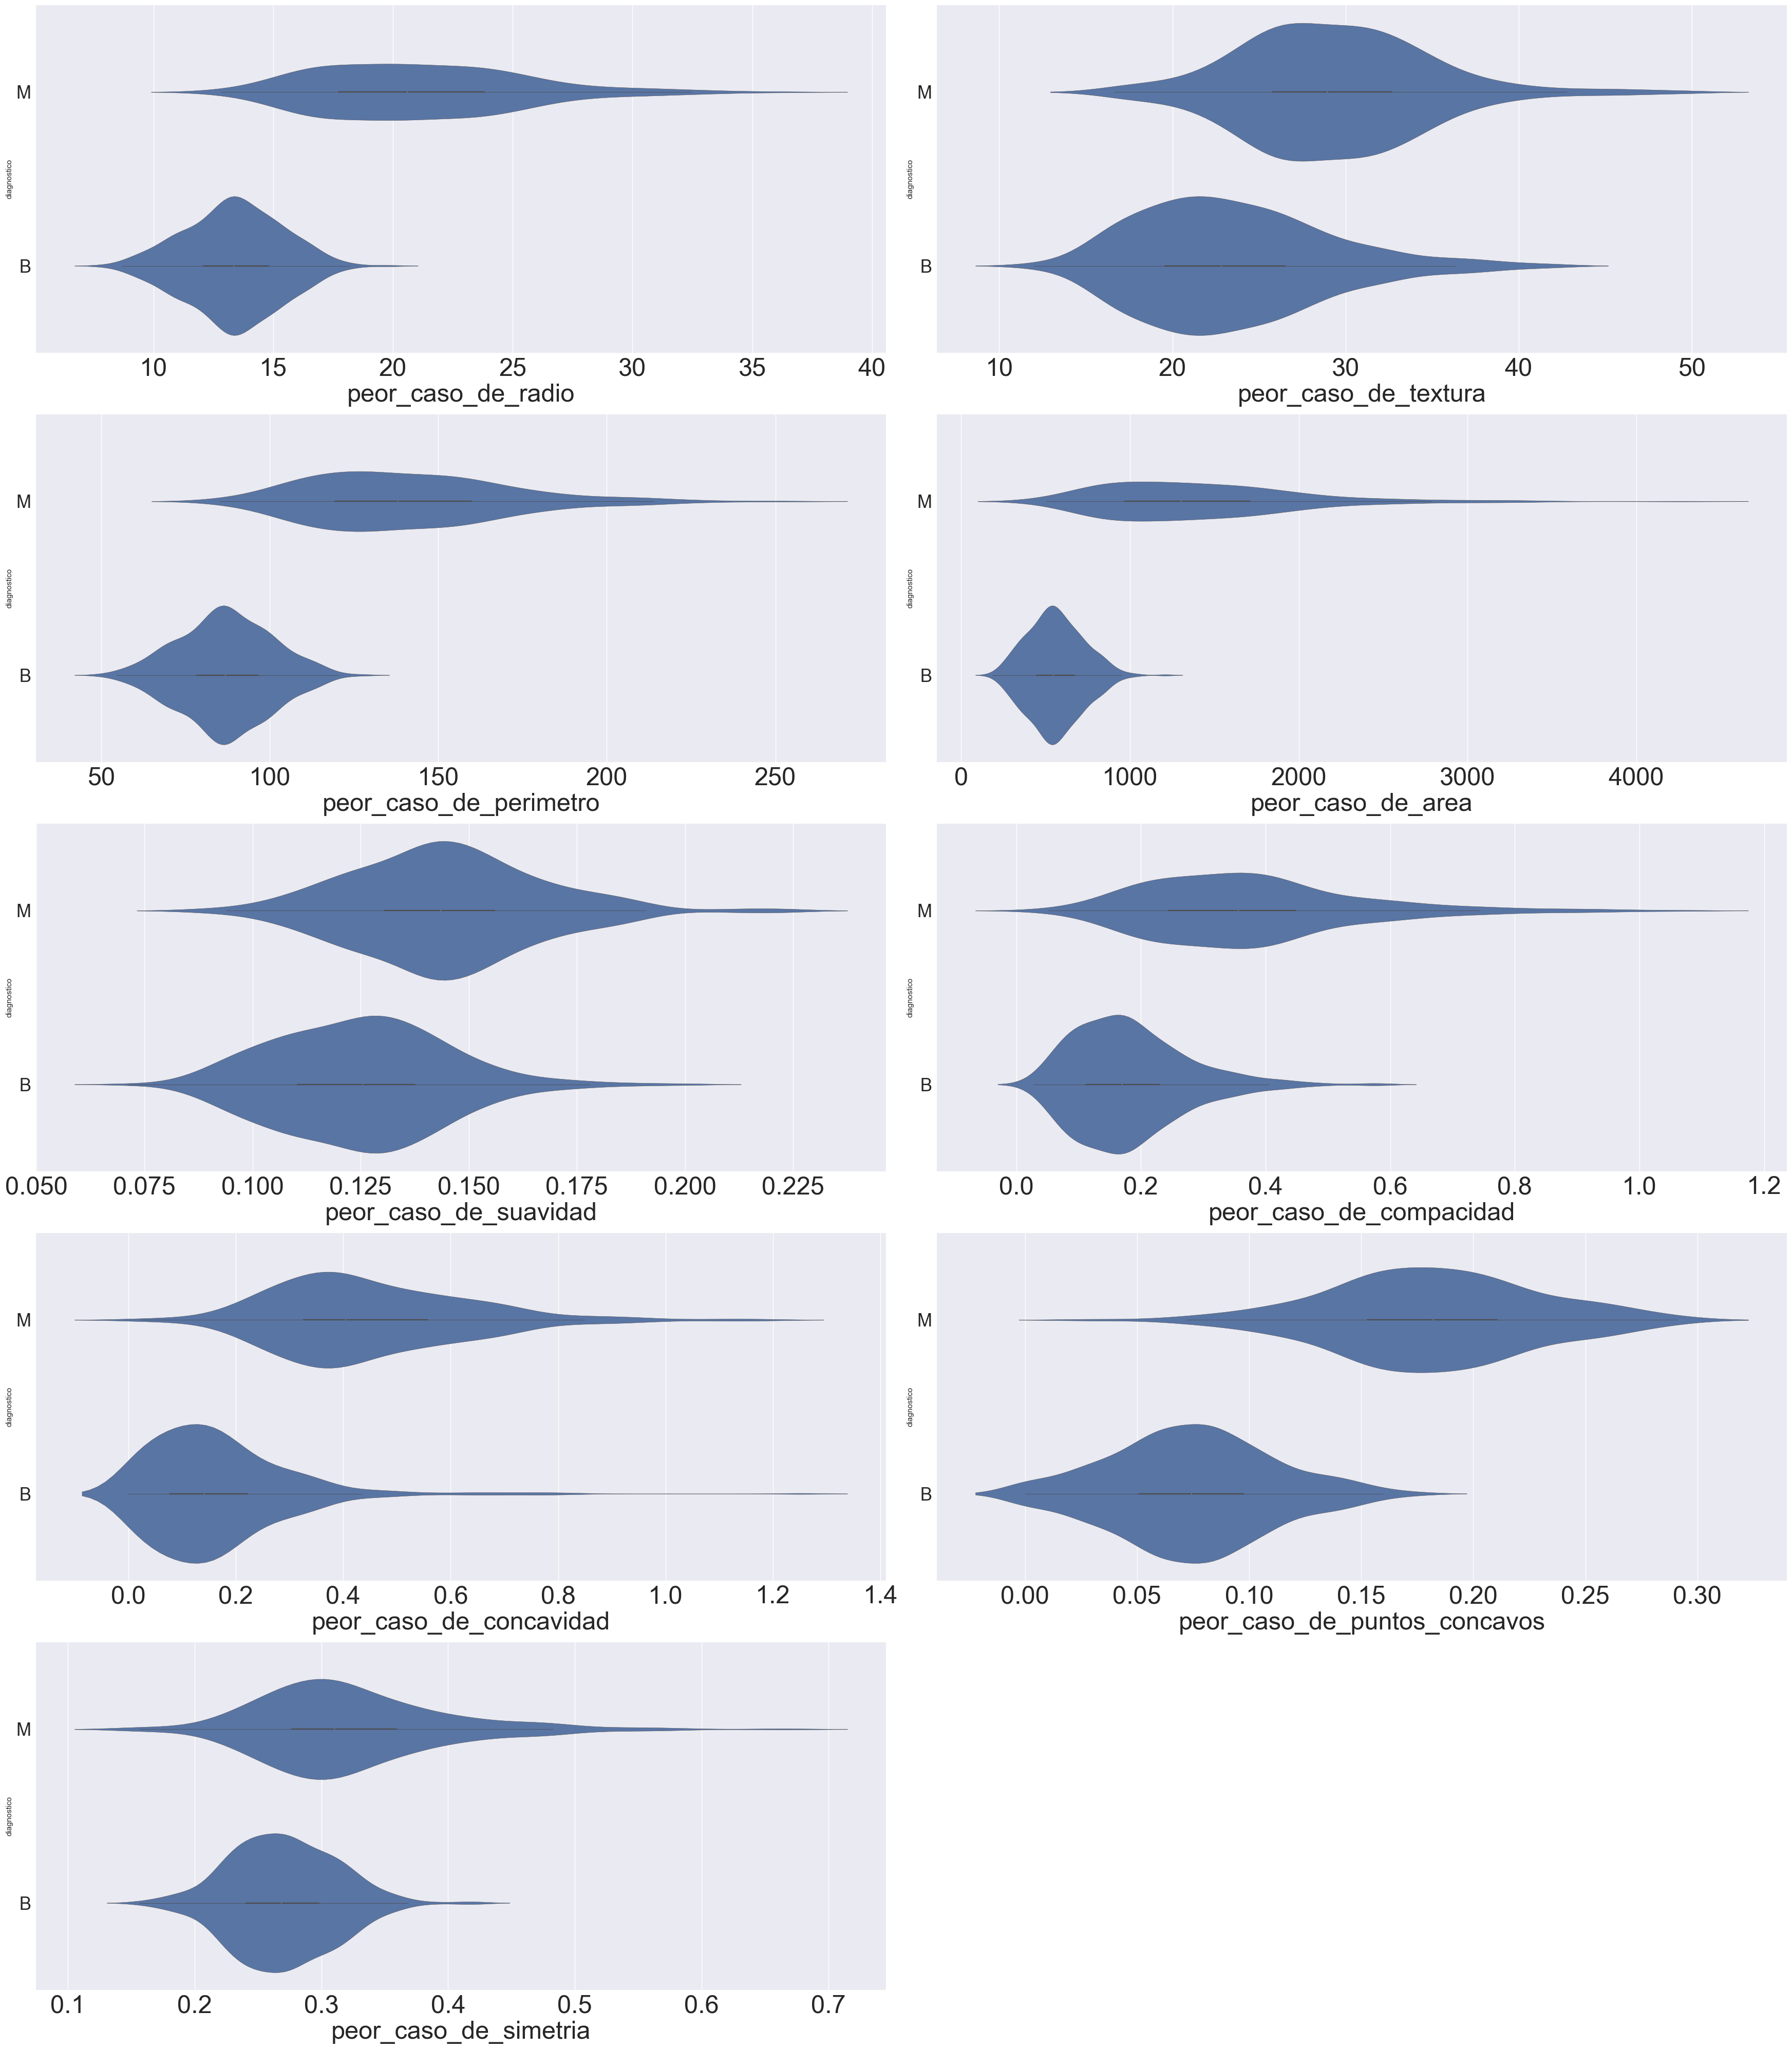

In [18]:
# Crear una cuadrícula de subgráficos con 2 columnas y 5 filas
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(35, 40), dpi=100)
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas del subconjunto df_viz3 para crear gráficos de violín
for i, col in enumerate(df_viz3.drop(columns='diagnostico').columns):
    sns.violinplot(x=col, y='diagnostico', data=df_viz3, ax=axs[i])  # Gráfico de violín para cada característica
    axs[i].set_xlabel(col, fontsize=35)  # Etiqueta x con el nombre de la característica
    axs[i].tick_params(axis='x', labelsize=35)  # Ajustar el tamaño de las etiquetas x
    axs[i].tick_params(axis='y', labelsize=25)  # Ajustar el tamaño de las etiquetas y

# Ocultar el último subgráfico vacío
axs[-1].set_visible(False)

# Ajustar el diseño para una presentación más clara
plt.tight_layout()  # Ajustar el diseño para evitar la superposición
plt.show()  # Mostrar los gráficos de violín en la cuadrícula

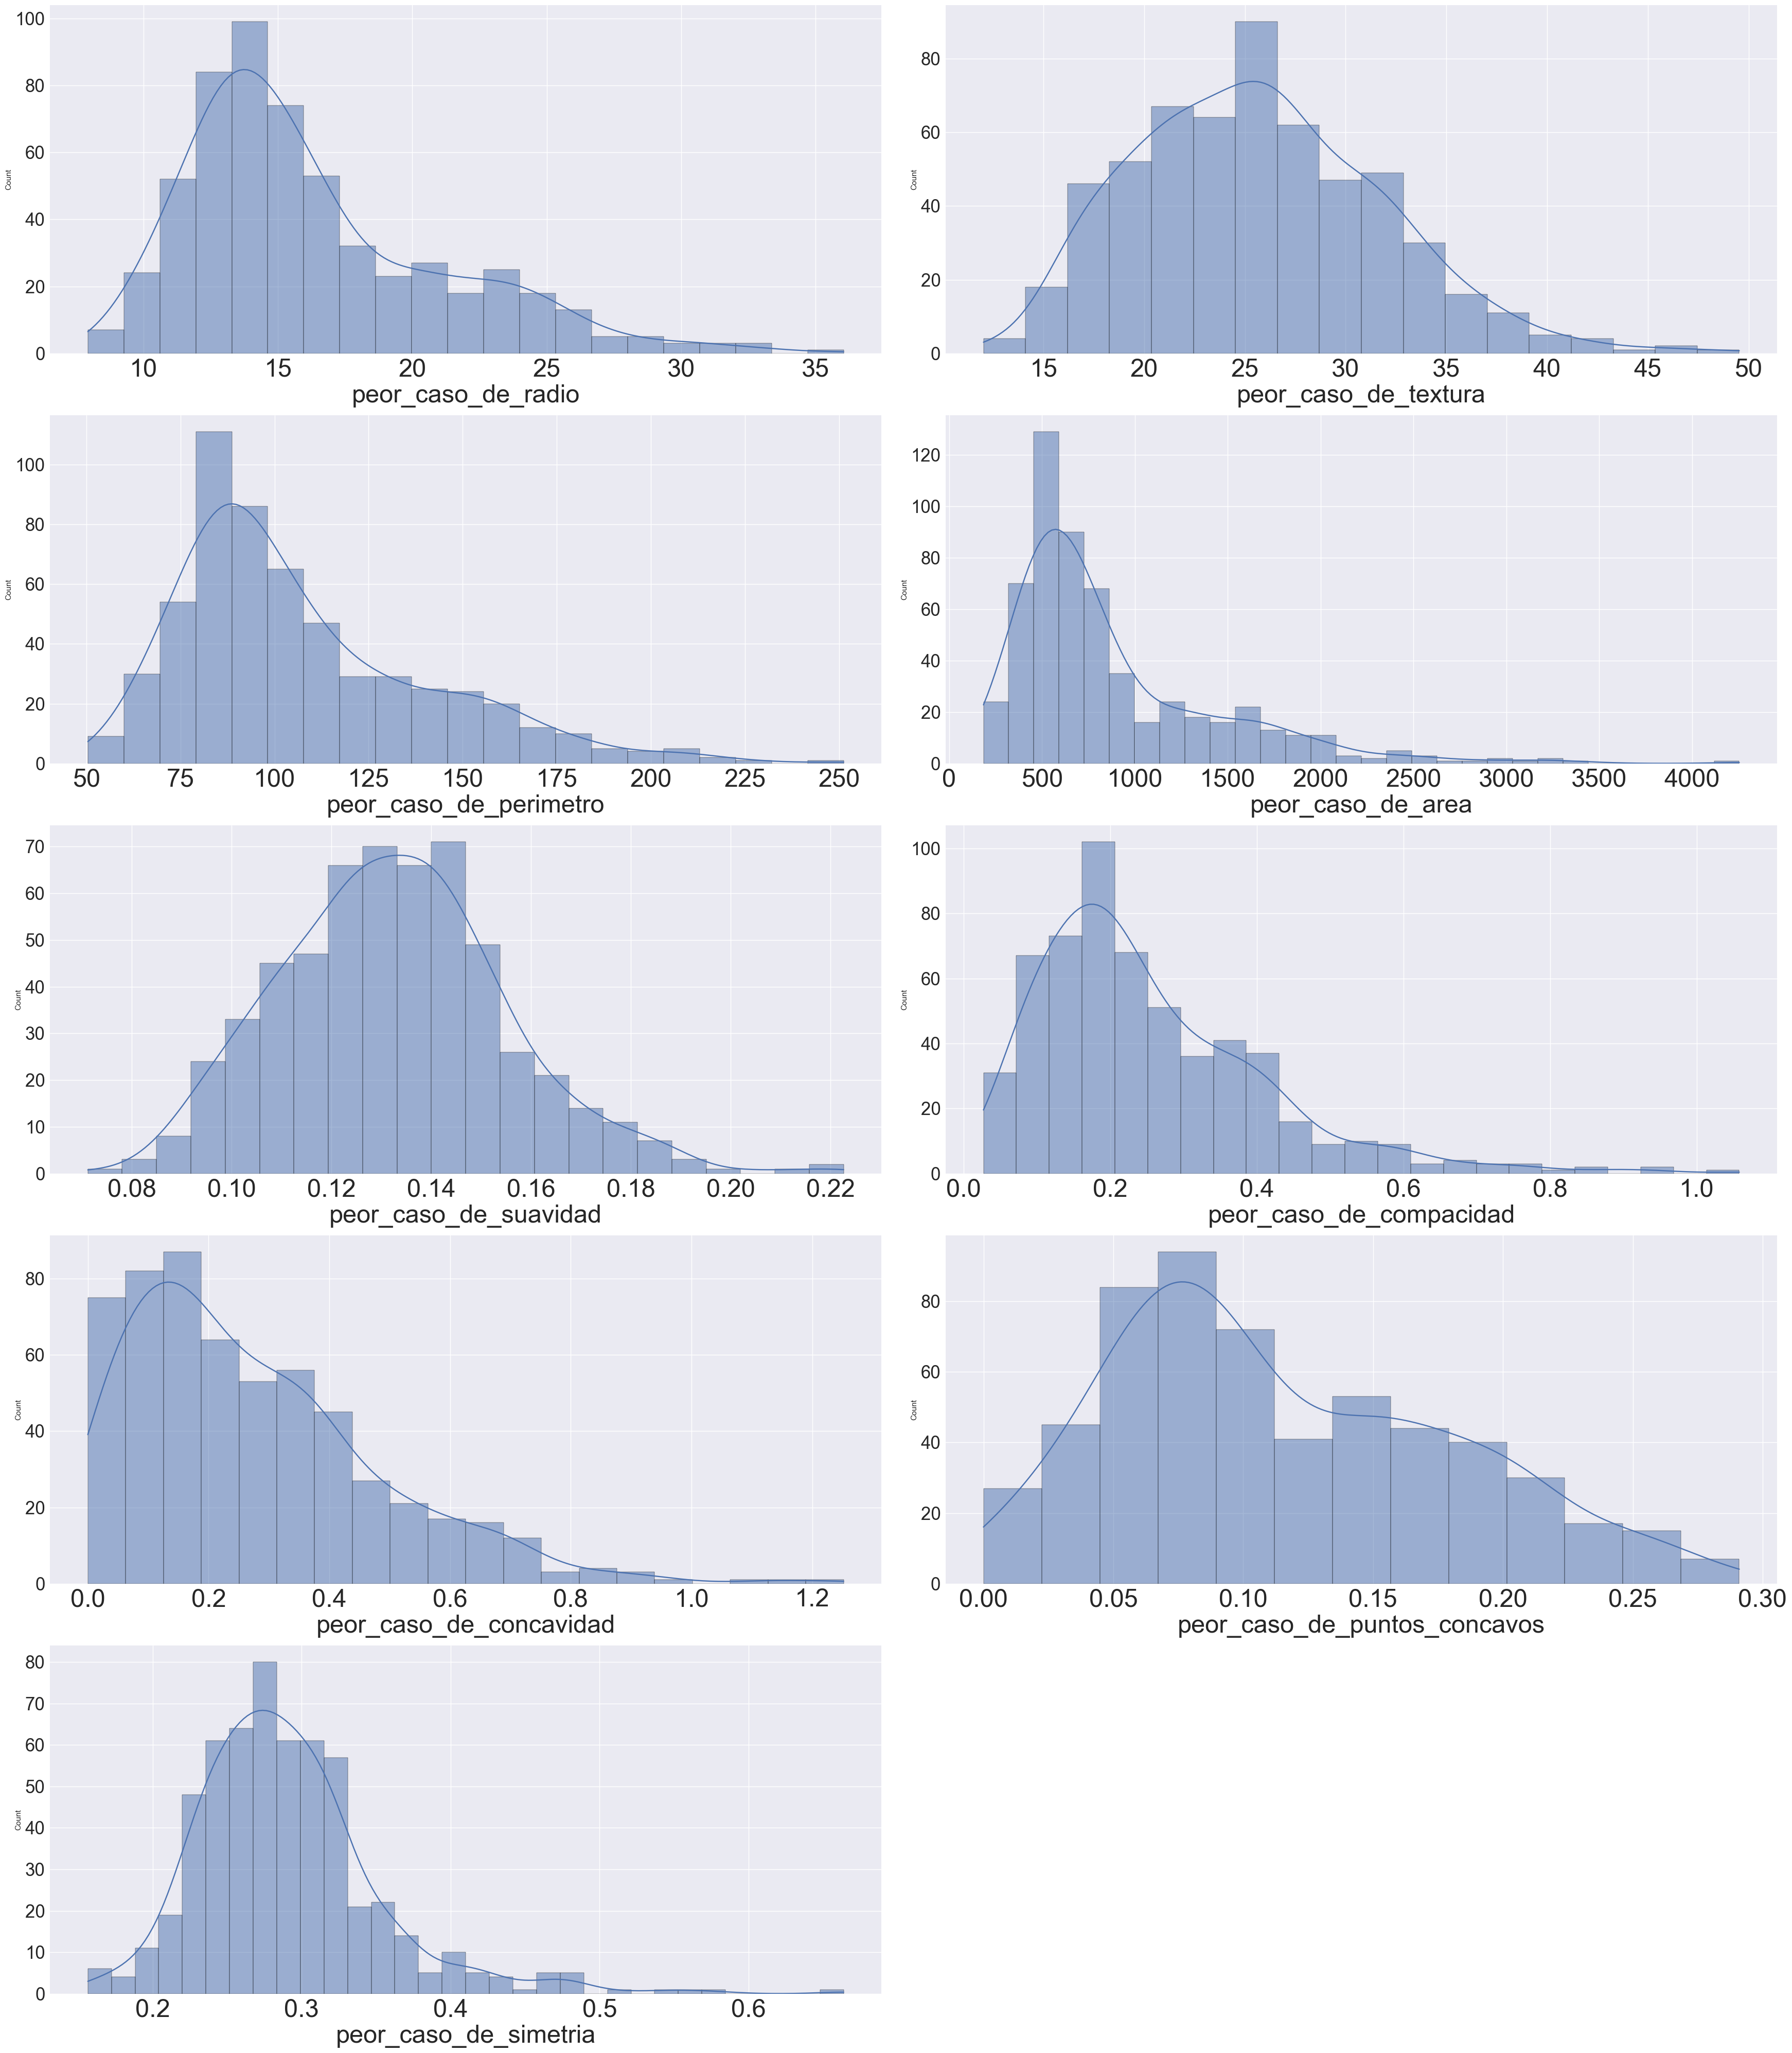

In [19]:
# Crear una cuadrícula de subgráficos con 2 columnas y 5 filas
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(35, 40), dpi=100)
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas del subconjunto df_viz3 para crear gráficos de histogramas con kde
for i, col in enumerate(df_viz3.drop(columns='diagnostico').columns):
    sns.histplot(x=col, data=df_viz3, kde=True, ax=axs[i])  # Histograma con kde para cada característica
    axs[i].set_xlabel(col, fontsize=35)  # Etiqueta x con el nombre de la característica
    axs[i].tick_params(axis='x', labelsize=35)  # Ajustar el tamaño de las etiquetas x
    axs[i].tick_params(axis='y', labelsize=25)  # Ajustar el tamaño de las etiquetas y

# Ocultar el último subgráfico vacío
axs[-1].set_visible(False)

# Ajustar el diseño para una presentación más clara
plt.tight_layout()  # Ajustar el diseño para evitar la superposición
plt.show()  # Mostrar los gráficos de histogramas en la cuadrícula

# Análisis de Correlación

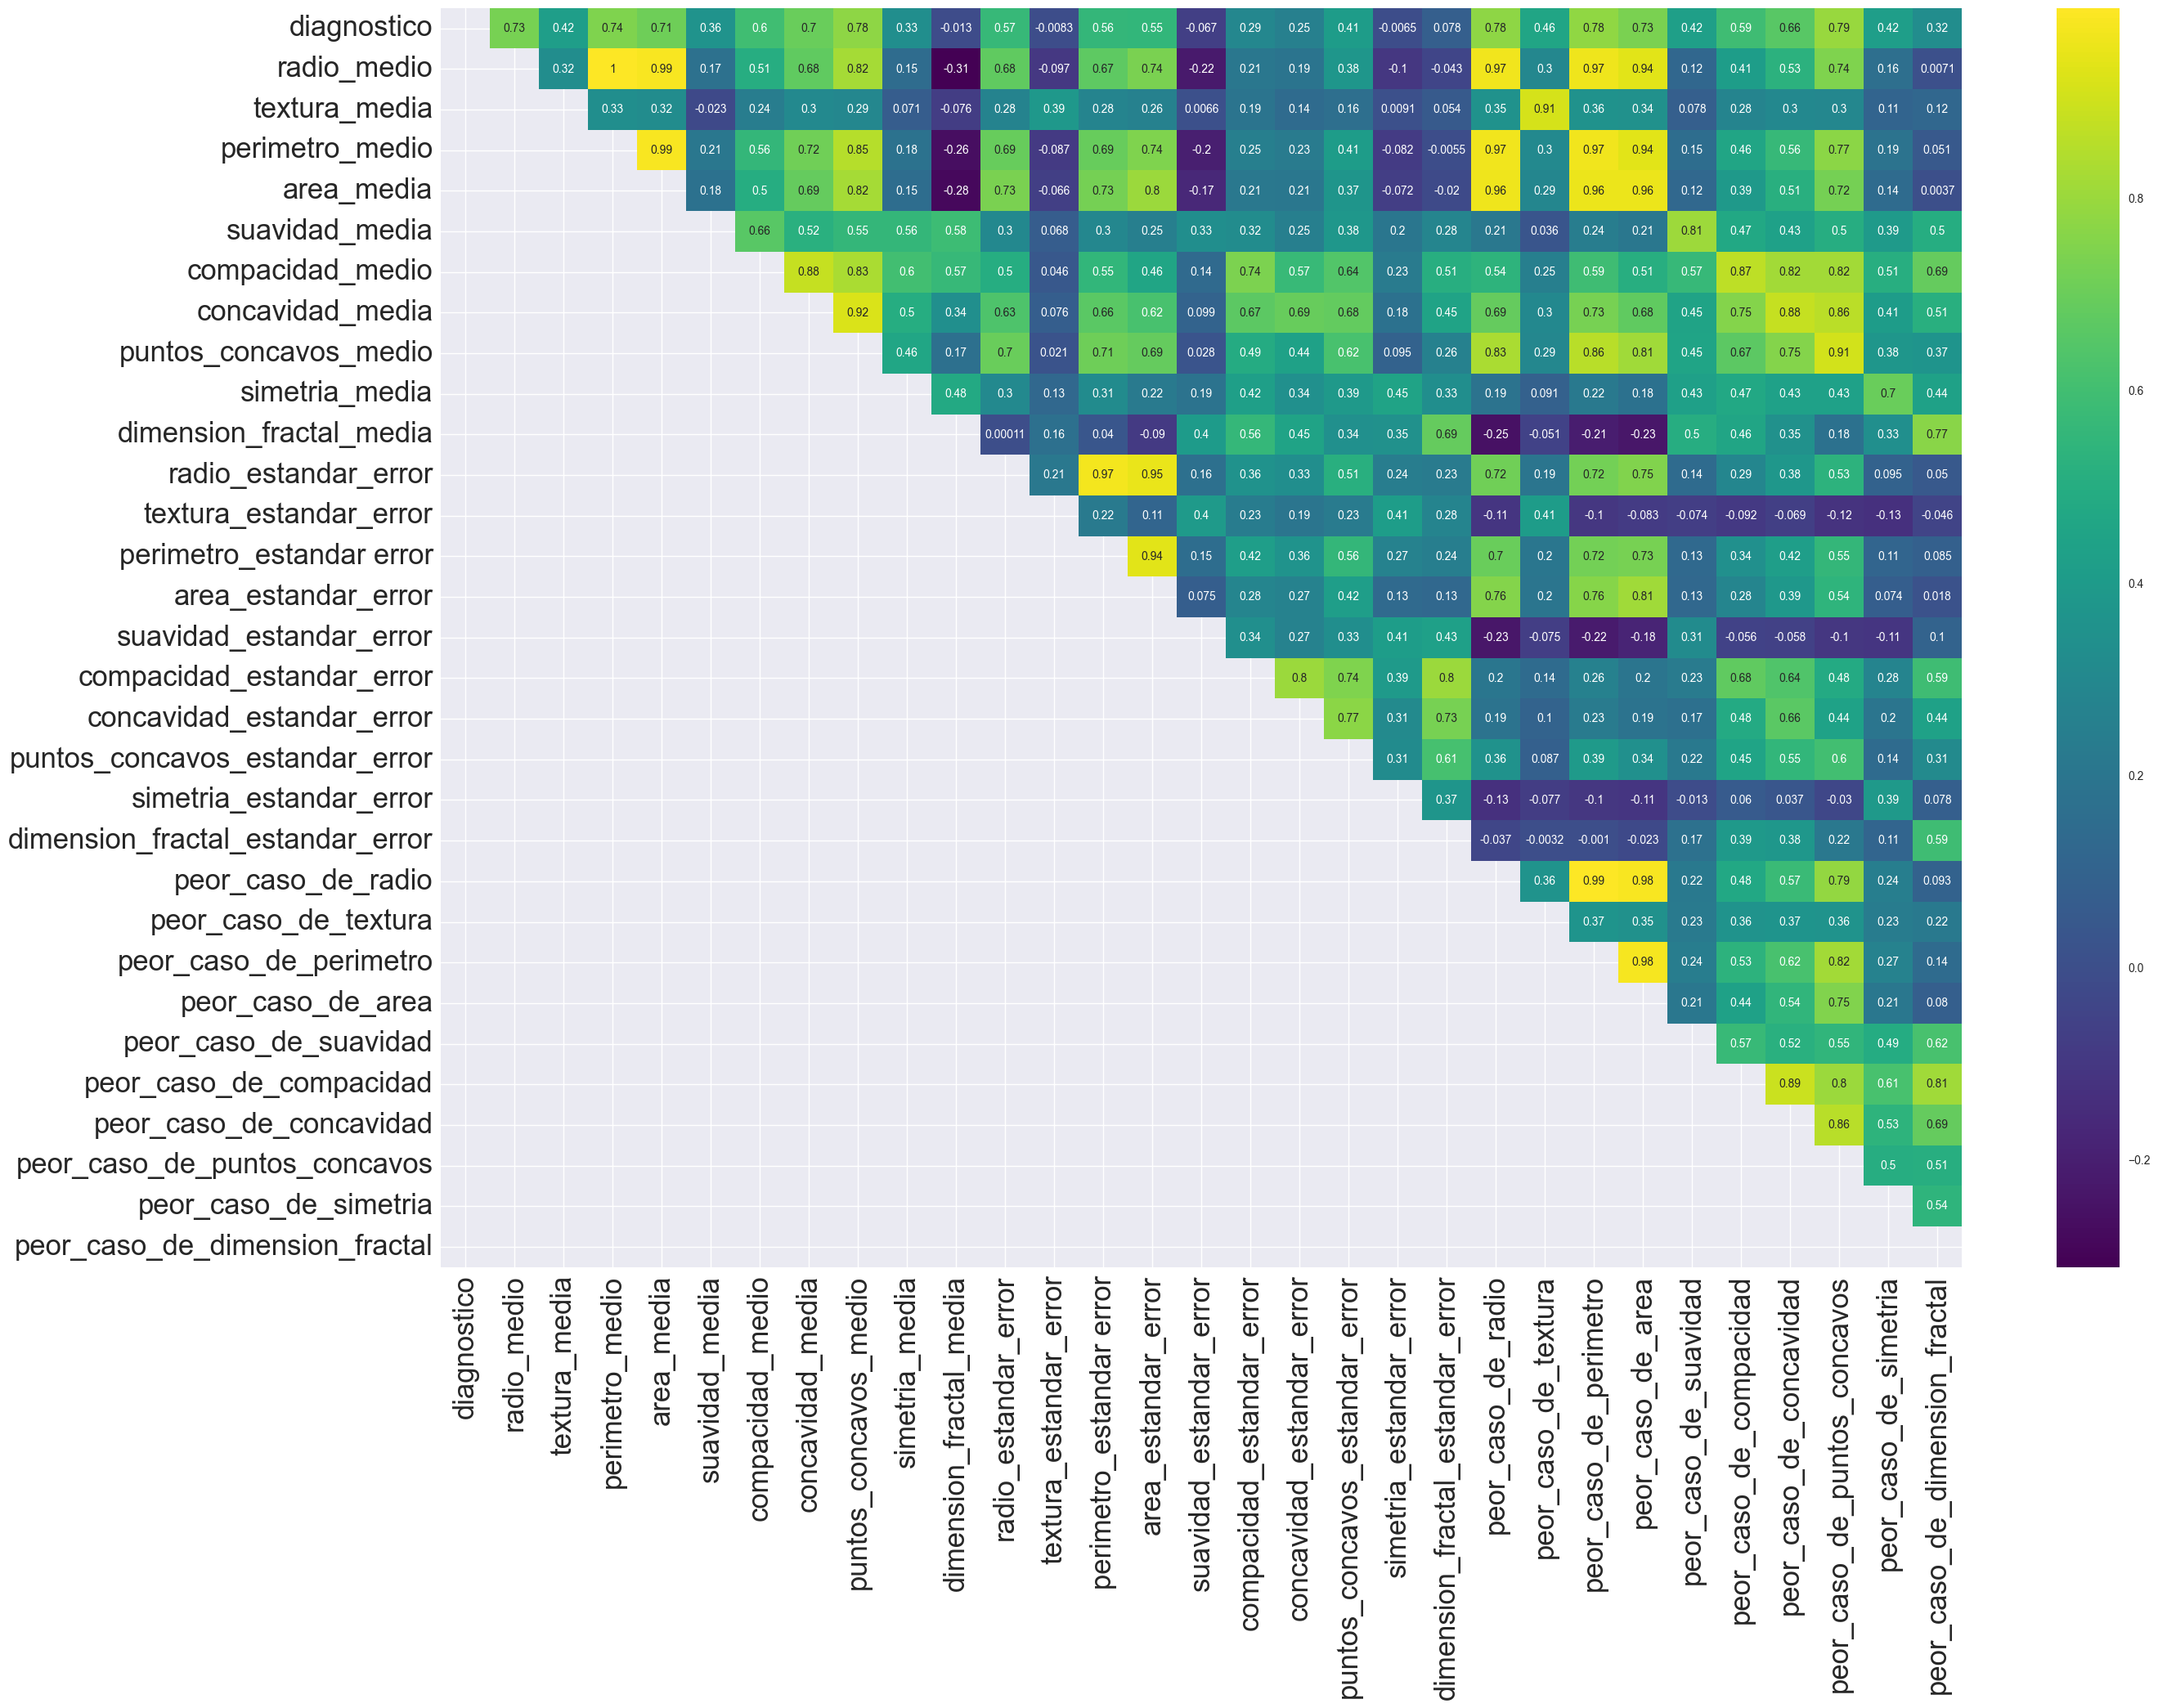

In [20]:
# Copiar el DataFrame para no modificar el original
df_codificado = df.copy()

# Convertir la variable categórica 'diagnostico' a valores numéricos (0 para 'B' y 1 para 'M')
df_codificado['diagnostico'] = df_codificado['diagnostico'].map({'B': 0, 'M': 1})

# Configurar el tamaño de la figura
plt.figure(figsize=(30, 20))

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(df_codificado.corr(), cmap='viridis', annot=True, mask=np.tril(np.ones_like(df_codificado.corr(), dtype=bool)))

# Ajustar el tamaño de las etiquetas del eje x y rotarlas 90 grados
plt.xticks(fontsize=25, rotation=90)

# Ajustar el tamaño de las etiquetas del eje y y mantenerlas en posición vertical
plt.yticks(fontsize=25, rotation=0)

# Mostrar el mapa de calor
plt.show()

# Análisis de Objetivo Categórico

diagnostico
B    357
M    212
Name: count, dtype: int64


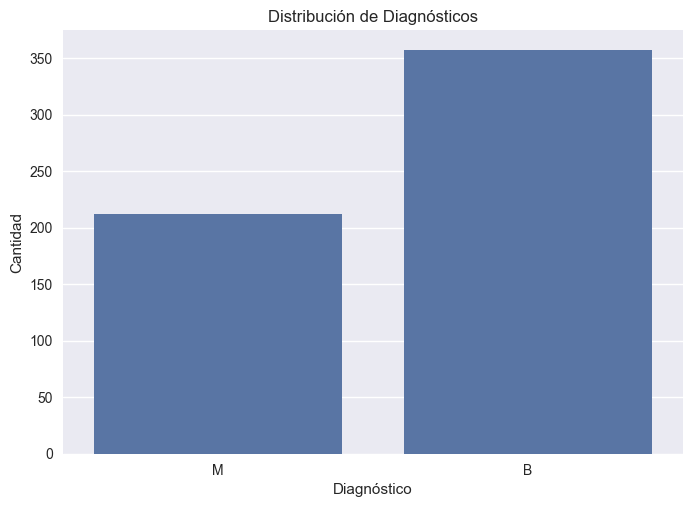

In [21]:
# Visualizar la distribución de la columna 'diagnosis'
sns.countplot(x='diagnostico', data=df)

# Mostrar el conteo de cada categoría
print(df['diagnostico'].value_counts())

# Ajustar la presentación del gráfico
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.title('Distribución de Diagnósticos')
plt.show()